#PROJET 3 Concevez une application au service de la santé publique

#ANALYSE DU DATASET

#Chargement du data set

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KDTree
import scipy.stats as st
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram
from sklearn import decomposition
from sklearn import preprocessing
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/')

### Chargement du dataset

In [ ]:
final_data=pd.read_csv("train_data_clean.csv",sep = '\t',low_memory=False)
final_data=final_data.drop('Unnamed: 0',axis=1)
final_data.head()

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,product_name,nutriscore_grade
0,439.0,10.53,1.75,75.44,17.54,5.30,7.02,1.0525,0.421,8.0,"Maple pecan flakes & clusters cereal, maple pe...",c
1,370.0,20.00,13.00,39.00,8.20,1.62,7.20,1.0000,0.400,19.0,Croissant pur beurre,e
2,229.0,9.69,3.08,19.82,1.32,0.40,14.54,1.5650,0.626,11.0,Applewood ham and swiss hoagie,d
3,300.0,21.25,7.50,23.75,2.50,1.20,3.75,0.9700,0.388,13.0,Stuffed jalapenos with cream cheese,d
4,36.0,0.00,0.00,8.80,3.20,3.20,0.80,0.0100,0.004,-8.0,100% pure pumpkin,a


###Création de Data set par catégorie de Nutri-score

Text(0.5, 1.0, 'Nb entrée par score')

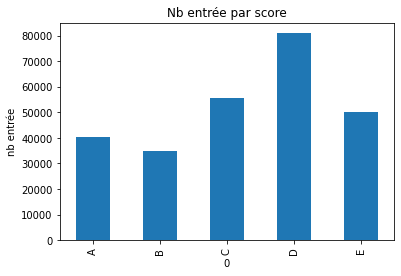

In [ ]:
scor_A = final_data.copy()
scor_B = final_data.copy()
scor_C = final_data.copy()
scor_D = final_data.copy()
scor_E = final_data.copy()

scor_A=scor_A[scor_A['nutriscore_grade']=='a']
scor_A=scor_A.reset_index(drop=True)
scor_B=scor_B[scor_B['nutriscore_grade']=='b']
scor_B=scor_B.reset_index(drop=True)
scor_C=scor_C[scor_C['nutriscore_grade']=='c']
scor_C=scor_C.reset_index(drop=True)
scor_D=scor_D[scor_D['nutriscore_grade']=='d']
scor_D=scor_D.reset_index(drop=True)
scor_E=scor_E[scor_E['nutriscore_grade']=='e']
scor_E=scor_E.reset_index(drop=True)

#nb d'entrée par catégorie
letter_frame=[scor_A,scor_B,scor_C,scor_D,scor_E]
taille_cat=[]
for i in letter_frame:
  taille_cat.append(len(i))

#graph bar représentant le nb d'entrée par catégorie
letter=pd.DataFrame(['A','B','C','D','E'])
letter['nb entrée']= taille_cat
letter=letter.set_index(letter.iloc[:,0])

plt.figure()
letter['nb entrée'].plot.bar()
plt.ylabel('nb entrée')
plt.title('Nb entrée par score')

In [ ]:
#comparaison du nombre d'entrée 
print('la catégorie A possède : ', len (scor_A),'entrées')
print('la catégorie B possède : ', len (scor_B),'entrées')
print('la catégorie C possède : ', len (scor_C),'entrées')
print('la catégorie D possède : ', len (scor_D),'entrées')
print('la catégorie E possède : ', len (scor_E),'entrées')


la catégorie A possède :  40515 entrées
la catégorie B possède :  34954 entrées
la catégorie C possède :  55744 entrées
la catégorie D possède :  81118 entrées
la catégorie E possède :  50116 entrées


#Analyse des données


### Indicateurs statistiques et boxplots

In [ ]:
#fonction pour calculer des stats, tracer la distribution et le boxplot pour chaque indicateur
def analyse_uni (frame,liste_catégorie):
    
    for cat in liste_catégorie:
        
        print('pour la catégorie :', cat)
        print("-"*20)
        print("moy:\n",frame[cat].mean())#moyenne
        print("med:\n",frame[cat].median())#mediane
        print("mod:\n",frame[cat].mode())#modale
        print("var:\n",frame[cat].var(ddof=0))#variance
        print("ect:\n",frame[cat].std(ddof=0))#ecart type
        print("skw:\n",frame[cat].skew())#asymétrie
        print("kur:\n",frame[cat].kurtosis())#aplatissement
        print("-"*20)
        
        frame[cat].hist(bins=25)
        plt.show()
        
        df=pd.DataFrame(frame[cat].copy())
        
        df.boxplot(column=cat, vert=False, showfliers=False)
        plt.show()
        

In [ ]:
list_categorie = ['energy-kcal_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g','fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g','nutrition-score-fr_100g']

In [ ]:
letter_frame=[scor_A,scor_B,scor_C,scor_D,scor_E]

pour le score : a
pour la catégorie : energy-kcal_100g
--------------------
moy:
 158.56374066595833
med:
 98.99999999999996
mod:
 0    357.0
dtype: float64
var:
 18323.6297394368
ect:
 135.36480243932246
skw:
 0.9345604948455019
kur:
 -0.09978743710014815
--------------------


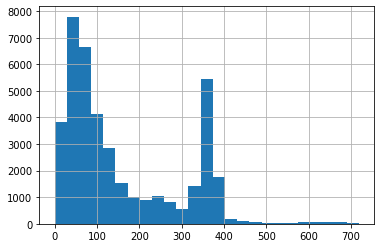

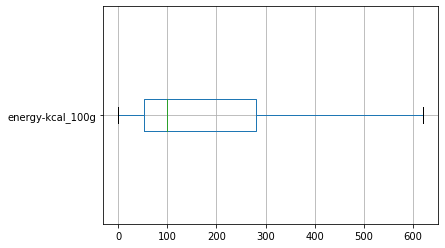

pour la catégorie : fat_100g
--------------------
moy:
 2.966821897910216
med:
 1.4000000000000004
mod:
 0    0.0
dtype: float64
var:
 39.644544181001216
ect:
 6.296391361804094
skw:
 6.453733623823188
kur:
 52.61195934823299
--------------------


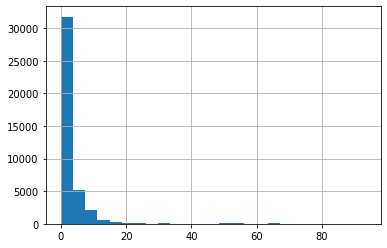

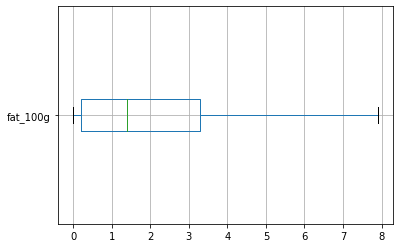

pour la catégorie : saturated-fat_100g
--------------------
moy:
 0.49979092325371977
med:
 0.09999999999999963
mod:
 0    0.0
dtype: float64
var:
 0.7418523168848544
ect:
 0.8613084911254819
skw:
 3.3513479143002476
kur:
 18.609634842818426
--------------------


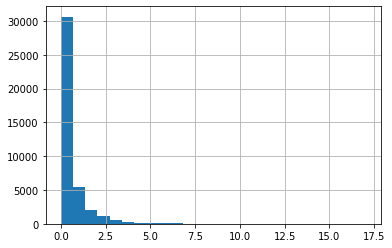

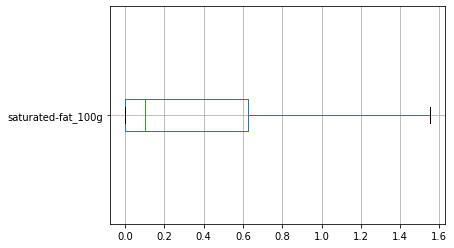

pour la catégorie : carbohydrates_100g
--------------------
moy:
 24.464375350601777
med:
 12.16
mod:
 0    0.0
dtype: float64
var:
 693.6949833335765
ect:
 26.33808997124842
skw:
 0.995397166424712
kur:
 -0.6138092102492205
--------------------


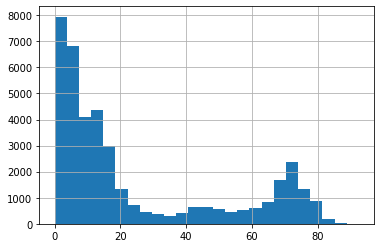

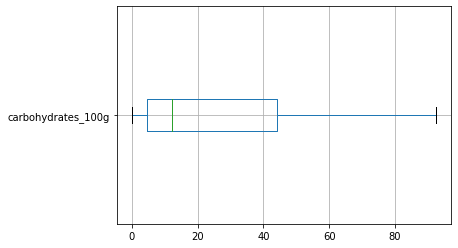

pour la catégorie : sugars_100g
--------------------
moy:
 3.8091422601332003
med:
 2.5
mod:
 0    0.0
dtype: float64
var:
 20.125399048534067
ect:
 4.486134087221878
skw:
 2.4863804241306693
kur:
 10.34669014513482
--------------------


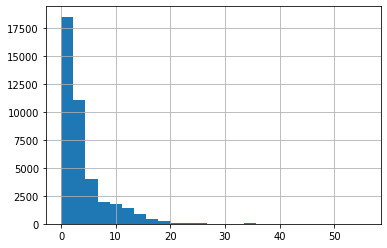

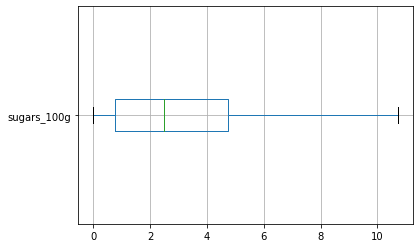

pour la catégorie : fiber_100g
--------------------
moy:
 3.255635523653028
med:
 2.1
mod:
 0    0.0
dtype: float64
var:
 17.929449104601176
ect:
 4.234318021193162
skw:
 4.597867023043194
kur:
 44.925254619216346
--------------------


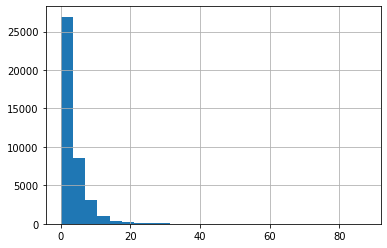

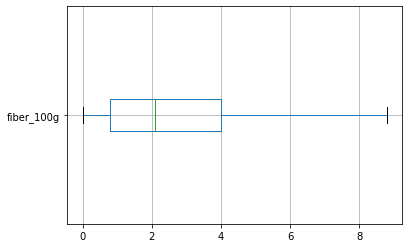

pour la catégorie : proteins_100g
--------------------
moy:
 7.854937602372397
med:
 6.67
mod:
 0    0.0
dtype: float64
var:
 52.46945027017065
ect:
 7.243579934684965
skw:
 2.2539430157351643
kur:
 13.802766683274397
--------------------


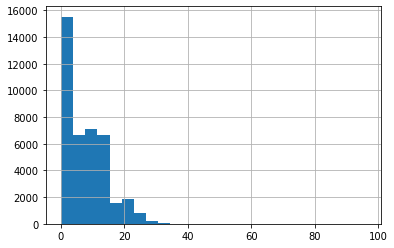

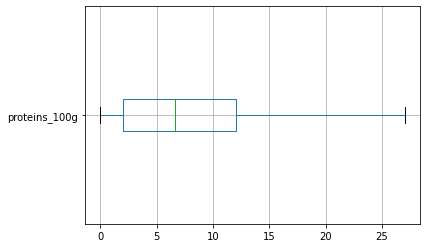

pour la catégorie : salt_100g
--------------------
moy:
 0.30936985340986606
med:
 0.1100000000000001
mod:
 0    0.0
dtype: float64
var:
 0.18660385995431084
ect:
 0.4319766891330027
skw:
 14.225035032517525
kur:
 783.4326440403356
--------------------


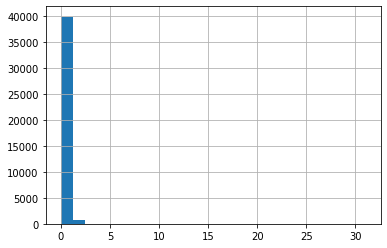

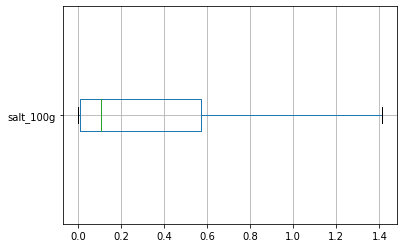

pour la catégorie : sodium_100g
--------------------
moy:
 0.12375680939058167
med:
 0.043999999999999984
mod:
 0    5.551115e-17
dtype: float64
var:
 0.02985659438071195
ect:
 0.17279060848527605
skw:
 14.225939635144174
kur:
 783.4566586460061
--------------------


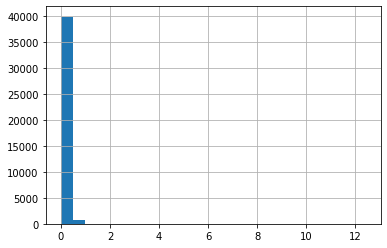

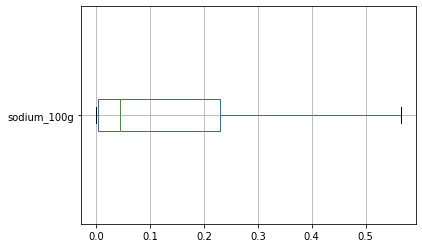

pour la catégorie : nutrition-score-fr_100g
--------------------
moy:
 -3.3469579168209305
med:
 -3.0
mod:
 0   -1.0
dtype: float64
var:
 4.859775701919972
ect:
 2.204489896080264
skw:
 -0.8385216973700851
kur:
 2.5305603708628044
--------------------


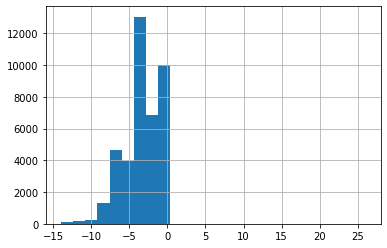

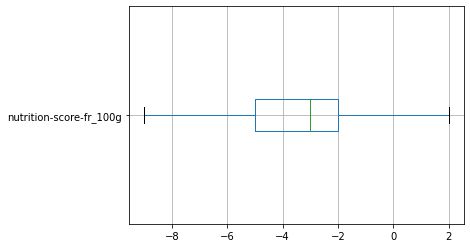

pour le score : b
pour la catégorie : energy-kcal_100g
--------------------
moy:
 142.41775164223563
med:
 108.0
mod:
 0    0.0
dtype: float64
var:
 13279.344837175537
ect:
 115.23603966283957
skw:
 1.4154432547606208
kur:
 2.414587835638932
--------------------


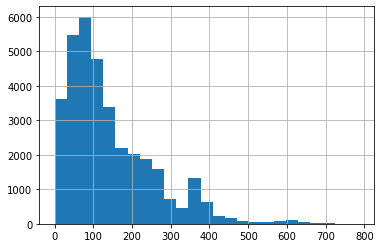

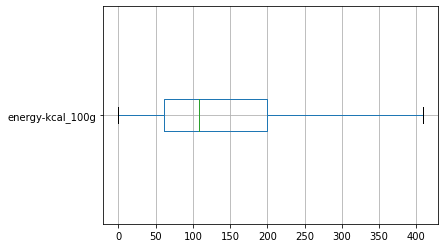

pour la catégorie : fat_100g
--------------------
moy:
 4.486270495330975
med:
 2.700000000000001
mod:
 0    0.0
dtype: float64
var:
 46.87537165875088
ect:
 6.846559110878316
skw:
 4.850404730071943
kur:
 33.66786288583309
--------------------


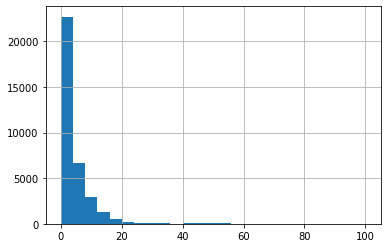

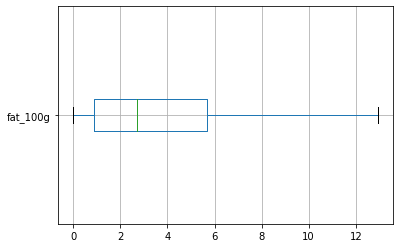

pour la catégorie : saturated-fat_100g
--------------------
moy:
 1.0781509141258216
med:
 0.7000000000000002
mod:
 0    0.0
dtype: float64
var:
 1.6345278896477518
ect:
 1.2784865621694081
skw:
 2.073015257366677
kur:
 7.930425163523962
--------------------


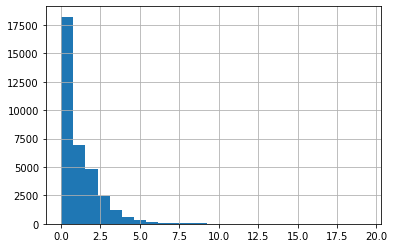

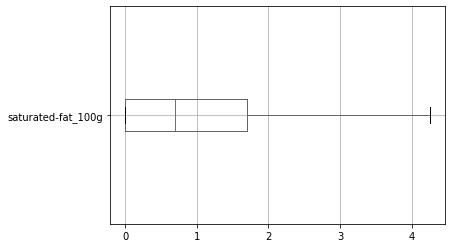

pour la catégorie : carbohydrates_100g
--------------------
moy:
 18.373067610272
med:
 11.0
mod:
 0    0.0
dtype: float64
var:
 452.2193269054794
ect:
 21.265449134816773
skw:
 1.694009328306581
kur:
 2.113093859722784
--------------------


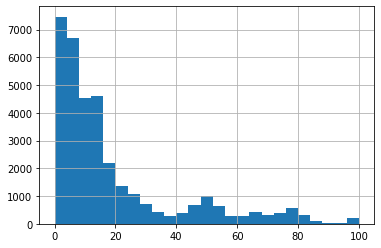

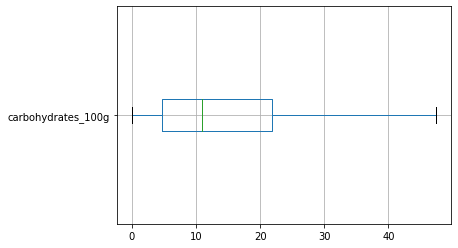

pour la catégorie : sugars_100g
--------------------
moy:
 4.931520700468825
med:
 2.700000000000001
mod:
 0    0.0
dtype: float64
var:
 55.66931377648856
ect:
 7.461187155975151
skw:
 4.294219478222551
kur:
 26.368876275677867
--------------------


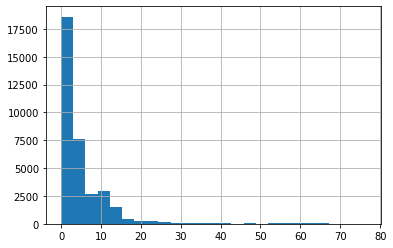

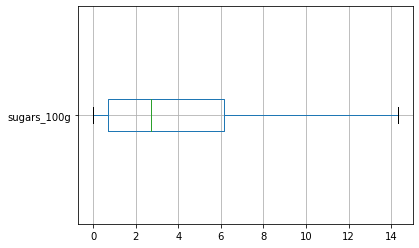

pour la catégorie : fiber_100g
--------------------
moy:
 1.5237633185729786
med:
 0.8000000000000003
mod:
 0    0.0
dtype: float64
var:
 5.871820902134027
ect:
 2.4231840421507456
skw:
 4.8248690133157695
kur:
 43.00753959221827
--------------------


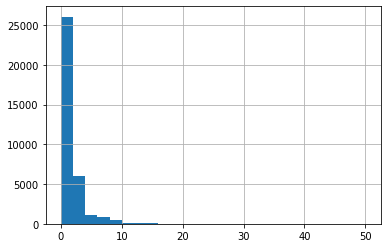

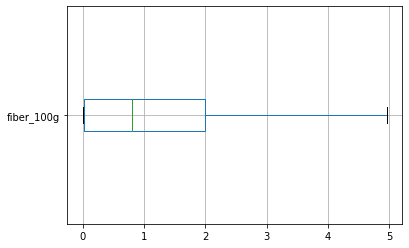

pour la catégorie : proteins_100g
--------------------
moy:
 6.854625442311661
med:
 4.6
mod:
 0    0.0
dtype: float64
var:
 59.76908363054505
ect:
 7.731046735762567
skw:
 3.722659384555155
kur:
 27.588886322075613
--------------------


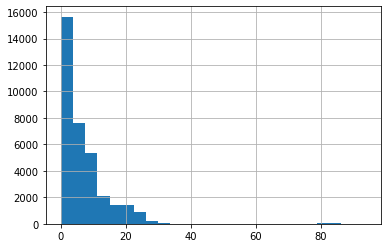

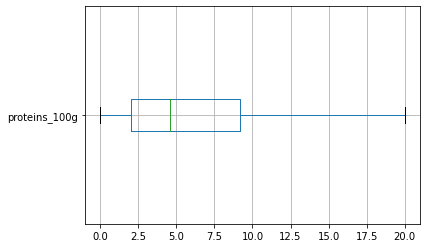

pour la catégorie : salt_100g
--------------------
moy:
 0.5610534742393487
med:
 0.52
mod:
 0    0.0
dtype: float64
var:
 0.3354296562838672
ect:
 0.5791628927027932
skw:
 20.909472202925357
kur:
 1685.7030303063448
--------------------


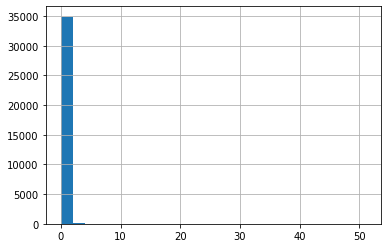

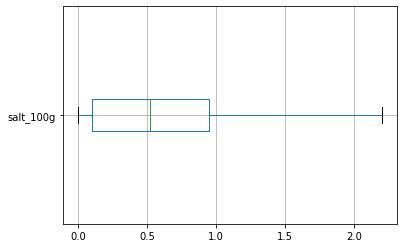

pour la catégorie : sodium_100g
--------------------
moy:
 0.2244256404080852
med:
 0.208
mod:
 0    5.551115e-17
dtype: float64
var:
 0.05366220428201735
ect:
 0.23165103988978195
skw:
 20.907417034917692
kur:
 1685.8958257279162
--------------------


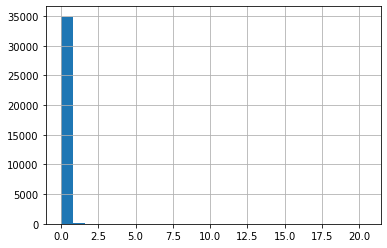

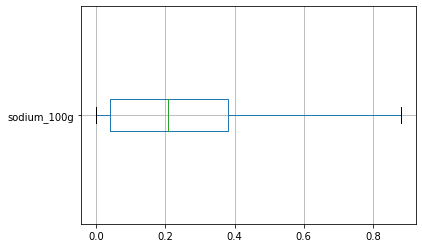

pour la catégorie : nutrition-score-fr_100g
--------------------
moy:
 0.9229844939062768
med:
 1.0
mod:
 0    1.0
dtype: float64
var:
 0.9775325930533719
ect:
 0.9887024795424415
skw:
 -1.8001572976107896
kur:
 10.818944925733765
--------------------


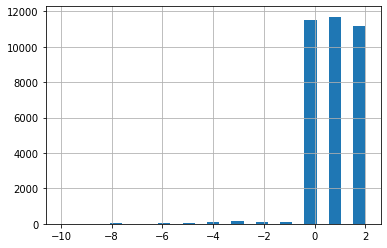

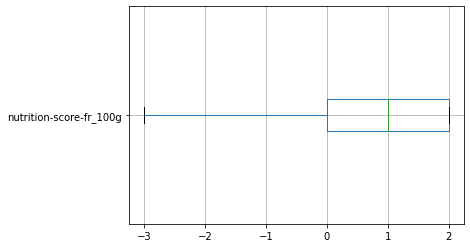

pour le score : c
pour la catégorie : energy-kcal_100g
--------------------
moy:
 215.71710681690385
med:
 175.0
mod:
 0    0.0
dtype: float64
var:
 28198.696338665573
ect:
 167.92467459746817
skw:
 1.5031889342259181
kur:
 2.8805729078681175
--------------------


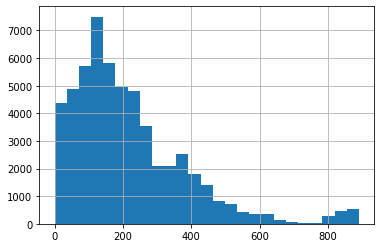

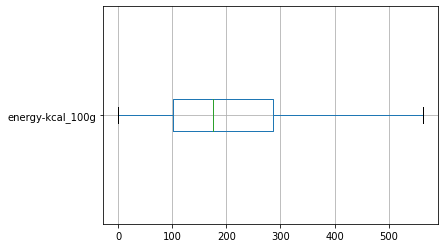

pour la catégorie : fat_100g
--------------------
moy:
 9.72463694704382
med:
 5.0
mod:
 0    0.0
dtype: float64
var:
 267.36832264468643
ect:
 16.35140124407344
skw:
 3.703294197857473
kur:
 15.510096791630453
--------------------


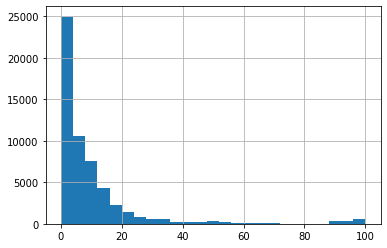

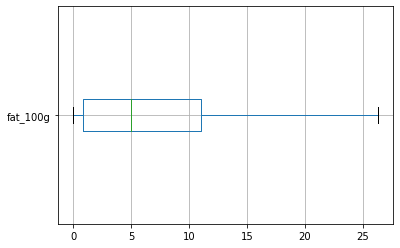

pour la catégorie : saturated-fat_100g
--------------------
moy:
 2.2968167929824657
med:
 1.4
mod:
 0    0.0
dtype: float64
var:
 11.261584087879758
ect:
 3.355828375808238
skw:
 4.8941279369290225
kur:
 55.96044921116727
--------------------


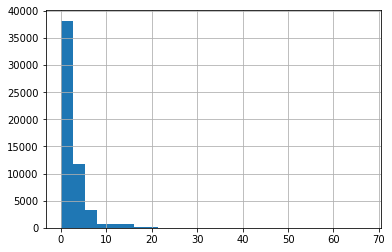

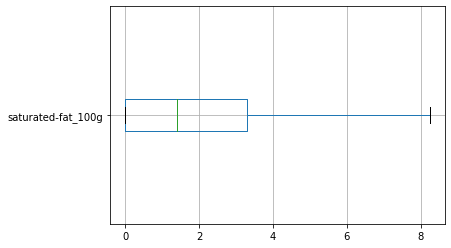

pour la catégorie : carbohydrates_100g
--------------------
moy:
 24.649933624600994
med:
 15.6
mod:
 0    0.0
dtype: float64
var:
 578.606536569737
ect:
 24.054241550498677
skw:
 0.9884591302550588
kur:
 -0.1401711230739333
--------------------


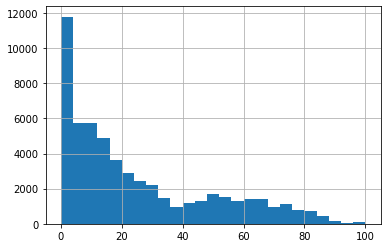

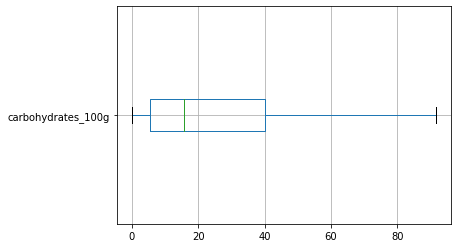

pour la catégorie : sugars_100g
--------------------
moy:
 10.529455836161555
med:
 3.700000000000001
mod:
 0    0.0
dtype: float64
var:
 223.81453861332508
ect:
 14.960432434034956
skw:
 2.1960449389042576
kur:
 4.924157872853641
--------------------


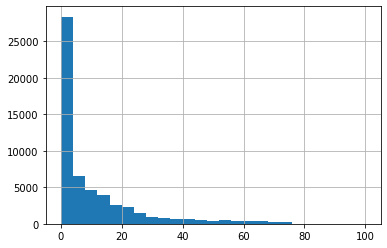

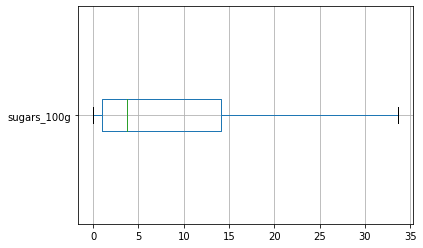

pour la catégorie : fiber_100g
--------------------
moy:
 1.987766717494315
med:
 0.8999999999999999
mod:
 0    0.0
dtype: float64
var:
 8.82606775356218
ect:
 2.9708698647975442
skw:
 3.256102101029179
kur:
 19.1481114810841
--------------------


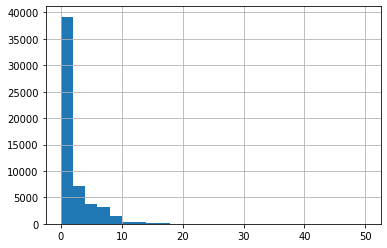

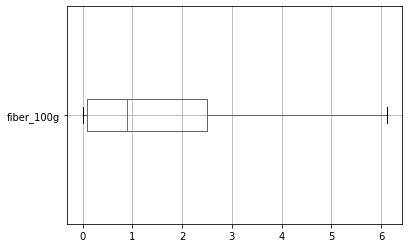

pour la catégorie : proteins_100g
--------------------
moy:
 6.523889079219046
med:
 4.0
mod:
 0    0.0
dtype: float64
var:
 56.96519970614631
ect:
 7.547529377627245
skw:
 2.6210506038116286
kur:
 15.203628688804109
--------------------


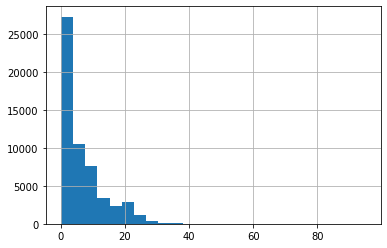

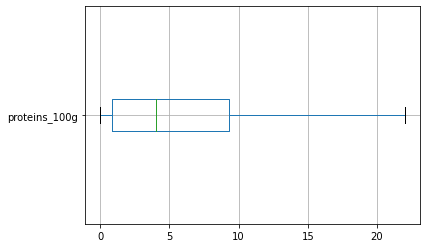

pour la catégorie : salt_100g
--------------------
moy:
 1.3300303355830407
med:
 0.79
mod:
 0    0.0
dtype: float64
var:
 30.566693944673936
ect:
 5.528715397330011
skw:
 13.348036250823707
kur:
 197.40703410527553
--------------------


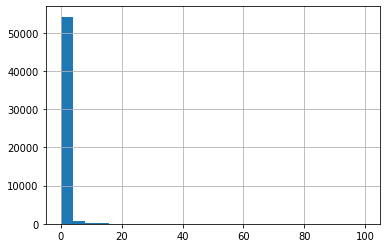

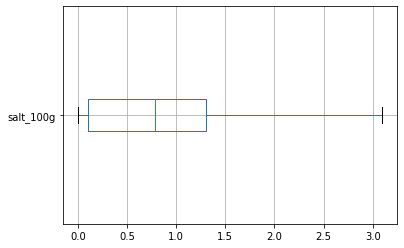

pour la catégorie : sodium_100g
--------------------
moy:
 0.5320201356935143
med:
 0.316
mod:
 0    5.551115e-17
dtype: float64
var:
 4.890768341830638
ect:
 2.2115081600190036
skw:
 13.348142496938516
kur:
 197.41074817582697
--------------------


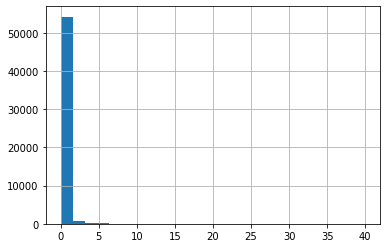

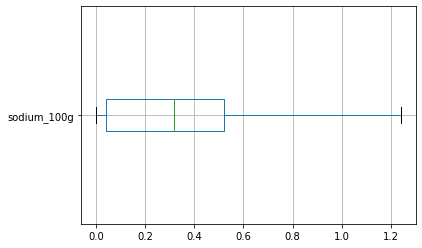

pour la catégorie : nutrition-score-fr_100g
--------------------
moy:
 5.717960677382319
med:
 5.0
mod:
 0    3.0
dtype: float64
var:
 5.848410192482953
ect:
 2.418348649902026
skw:
 0.46477884141514336
kur:
 -1.081918428873943
--------------------


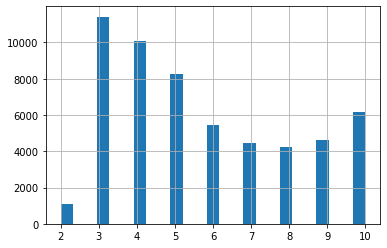

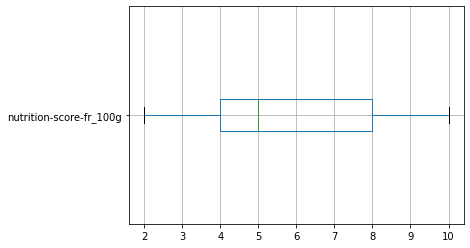

pour le score : d
pour la catégorie : energy-kcal_100g
--------------------
moy:
 322.07152721142955
med:
 325.0
mod:
 0    393.0
dtype: float64
var:
 19818.448037377988
ect:
 140.77800977914833
skw:
 0.3928696726864628
kur:
 1.2283617524139947
--------------------


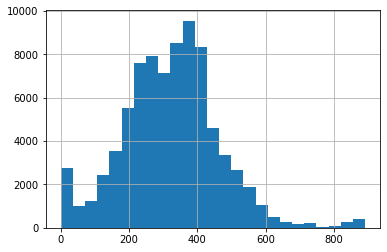

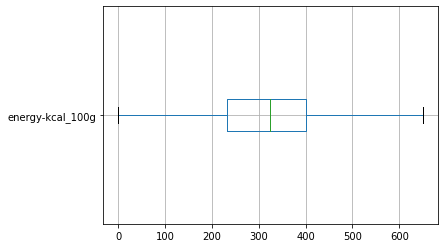

pour la catégorie : fat_100g
--------------------
moy:
 16.576644696984392
med:
 14.0
mod:
 0    0.0
dtype: float64
var:
 238.8682971596389
ect:
 15.455364672489578
skw:
 1.8587710865969809
kur:
 6.195848286703394
--------------------


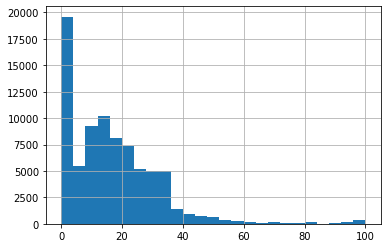

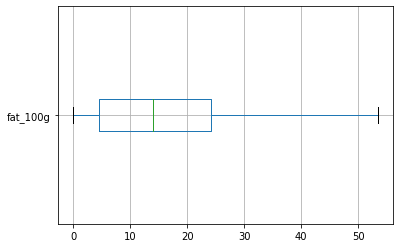

pour la catégorie : saturated-fat_100g
--------------------
moy:
 6.3272242603900715
med:
 4.1
mod:
 0    0.0
dtype: float64
var:
 49.89559515772502
ect:
 7.063681416777304
skw:
 1.7968227957986285
kur:
 5.467623433400655
--------------------


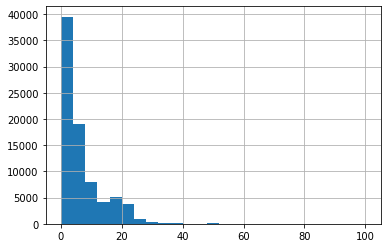

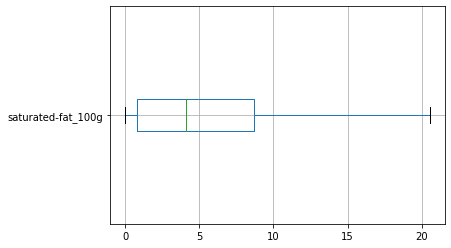

pour la catégorie : carbohydrates_100g
--------------------
moy:
 33.05849324127796
med:
 26.6
mod:
 0    0.0
dtype: float64
var:
 903.4828640537036
ect:
 30.05799168363887
skw:
 0.4817964469569438
kur:
 -1.1099014617405685
--------------------


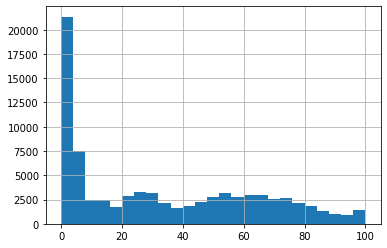

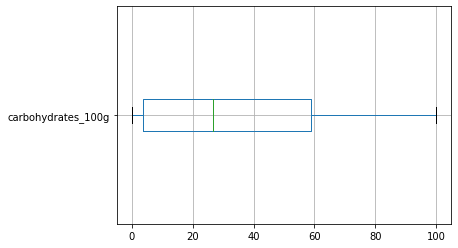

pour la catégorie : sugars_100g
--------------------
moy:
 17.31154982469385
med:
 5.360000000000001
mod:
 0    0.0
dtype: float64
var:
 504.611199039977
ect:
 22.463552680731002
skw:
 1.5291597526445009
kur:
 1.7370679997925818
--------------------


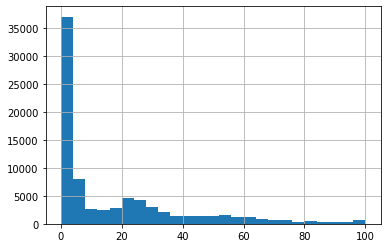

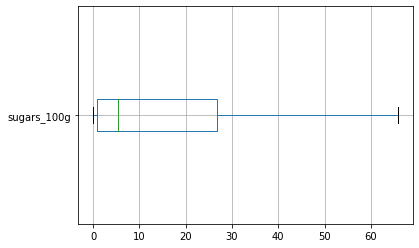

pour la catégorie : fiber_100g
--------------------
moy:
 1.390436295062282
med:
 0.3799999999999999
mod:
 0    0.0
dtype: float64
var:
 5.2606711746573955
ect:
 2.2936153065972933
skw:
 2.981069998630601
kur:
 12.677515088263199
--------------------


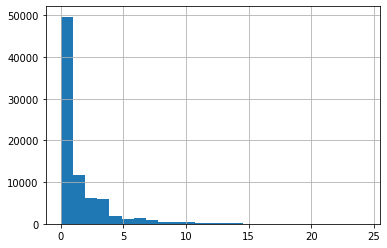

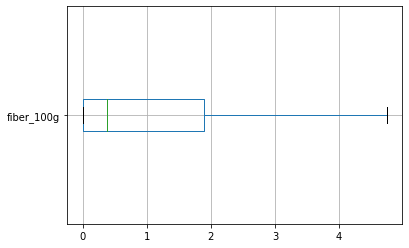

pour la catégorie : proteins_100g
--------------------
moy:
 9.4325657955119
med:
 6.755
mod:
 0    0.0
dtype: float64
var:
 84.59584806727818
ect:
 9.197600125428274
skw:
 1.5870482147934202
kur:
 4.920651707421514
--------------------


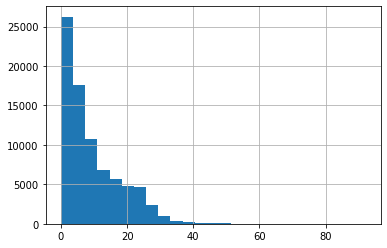

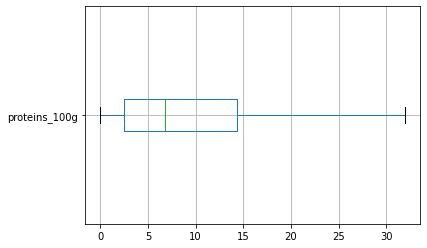

pour la catégorie : salt_100g
--------------------
moy:
 1.4651065454154883
med:
 1.04153333333335
mod:
 0    0.0
dtype: float64
var:
 7.6835307267731565
ect:
 2.771918239554182
skw:
 11.688330034926814
kur:
 211.91237826576133
--------------------


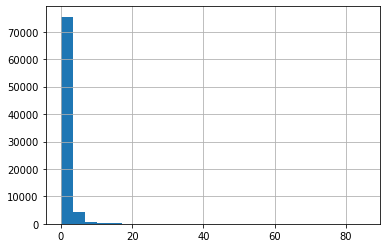

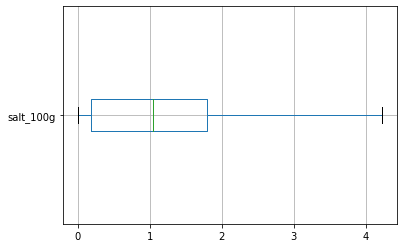

pour la catégorie : sodium_100g
--------------------
moy:
 0.586035316223385
med:
 0.41656
mod:
 0    5.551115e-17
dtype: float64
var:
 1.229374988548647
ect:
 1.1087718379128535
skw:
 11.689004574652035
kur:
 211.94732060971995
--------------------


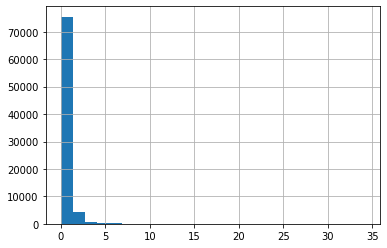

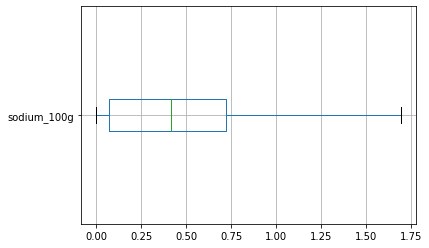

pour la catégorie : nutrition-score-fr_100g
--------------------
moy:
 13.90881185433566
med:
 14.0
mod:
 0    14.0
dtype: float64
var:
 6.555369724186105
ect:
 2.5603456259235986
skw:
 -0.4762792350337547
kur:
 0.3178842934761672
--------------------


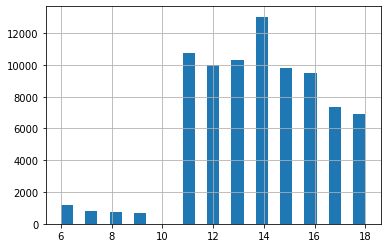

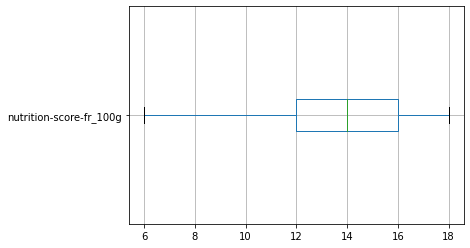

pour le score : e
pour la catégorie : energy-kcal_100g
--------------------
moy:
 402.4184664650449
med:
 442.0
mod:
 0    500.0
dtype: float64
var:
 30254.882382599193
ect:
 173.93930660606645
skw:
 -0.7332925931570579
kur:
 0.19433743116405955
--------------------


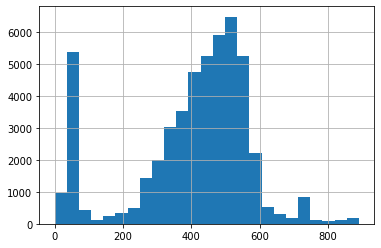

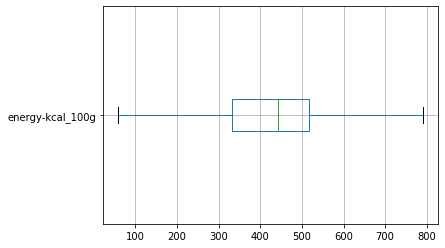

pour la catégorie : fat_100g
--------------------
moy:
 24.53431873620946
med:
 24.0
mod:
 0    0.0
dtype: float64
var:
 296.70601575483937
ect:
 17.225156479836095
skw:
 1.058475253605343
kur:
 2.6594871791981602
--------------------


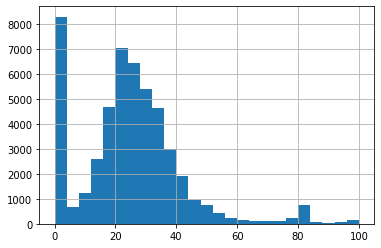

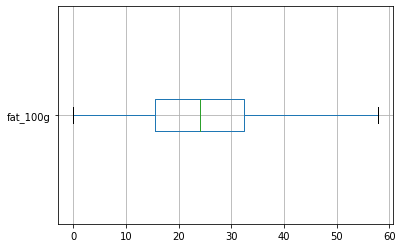

pour la catégorie : saturated-fat_100g
--------------------
moy:
 12.21814104908574
med:
 11.0
mod:
 0    0.0
dtype: float64
var:
 111.01835063295947
ect:
 10.536524599361949
skw:
 2.6988203395067956
kur:
 14.144519881568081
--------------------


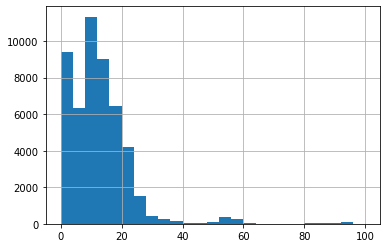

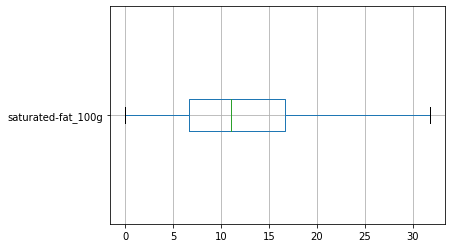

pour la catégorie : carbohydrates_100g
--------------------
moy:
 37.14558764325372
med:
 46.0
mod:
 0    0.0
dtype: float64
var:
 690.8279282679678
ect:
 26.283605693815446
skw:
 -0.14350617825929463
kur:
 -1.4669369782709825
--------------------


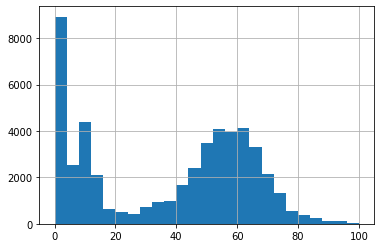

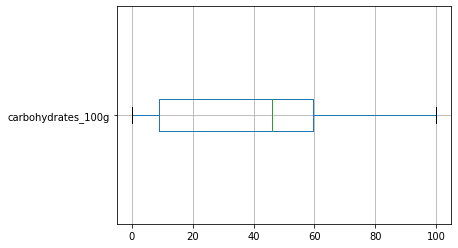

pour la catégorie : sugars_100g
--------------------
moy:
 25.077742125044995
med:
 25.6
mod:
 0    0.0
dtype: float64
var:
 420.28384388949274
ect:
 20.500825444100848
skw:
 0.3559937473418853
kur:
 -0.9544416947845513
--------------------


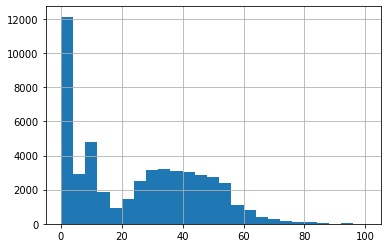

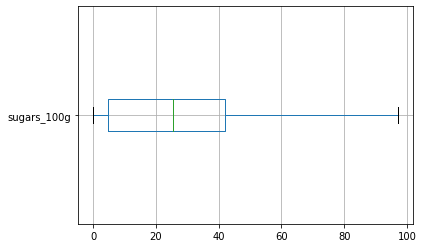

pour la catégorie : fiber_100g
--------------------
moy:
 1.1348649222603464
med:
 0.44
mod:
 0    0.0
dtype: float64
var:
 2.707520430291404
ect:
 1.6454544753020073
skw:
 2.6097524251518687
kur:
 11.105399557695597
--------------------


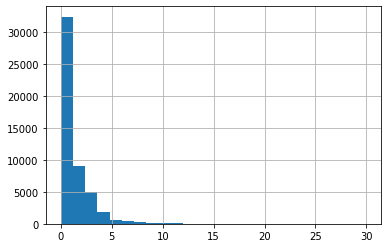

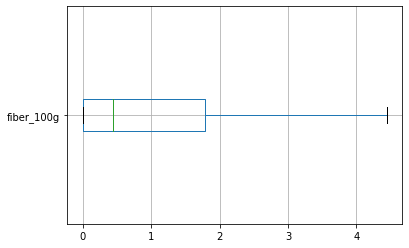

pour la catégorie : proteins_100g
--------------------
moy:
 7.4753949284775665
med:
 5.6
mod:
 0    0.0
dtype: float64
var:
 71.82235228627493
ect:
 8.47480691734478
skw:
 2.8422093553423147
kur:
 12.81417811860237
--------------------


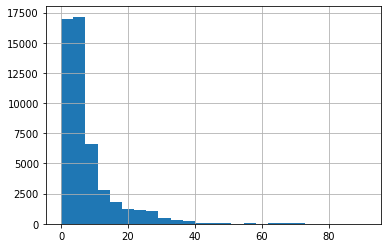

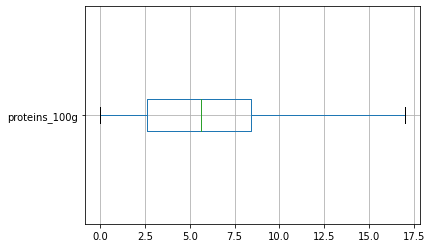

pour la catégorie : salt_100g
--------------------
moy:
 1.1271104457288612
med:
 0.5675
mod:
 0    0.0
dtype: float64
var:
 3.210628460859955
ect:
 1.7918226644564899
skw:
 9.96496285475821
kur:
 240.54725458200406
--------------------


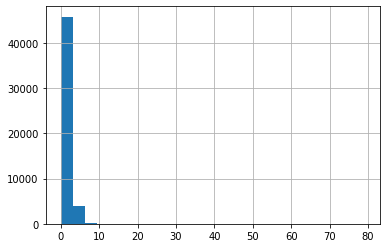

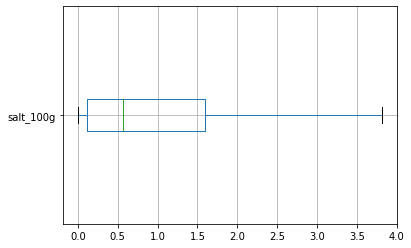

pour la catégorie : sodium_100g
--------------------
moy:
 0.4508471087345459
med:
 0.22699999999999995
mod:
 0    5.551115e-17
dtype: float64
var:
 0.5137260488326537
ect:
 0.7167468512889705
skw:
 9.965287715586763
kur:
 240.5432197390063
--------------------


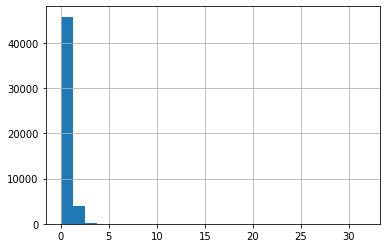

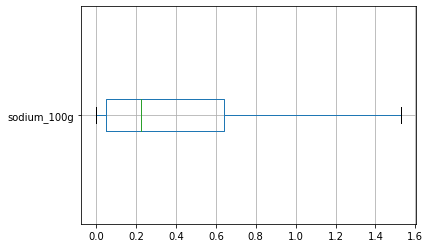

pour la catégorie : nutrition-score-fr_100g
--------------------
moy:
 21.33993135924655
med:
 21.0
mod:
 0    19.0
dtype: float64
var:
 16.445904089790496
ect:
 4.055354989367823
skw:
 -0.6549360125870348
kur:
 0.5055242008692948
--------------------


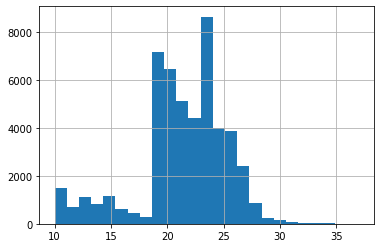

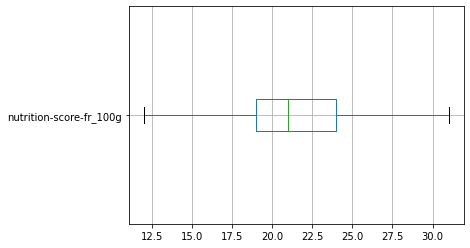

In [ ]:
for fra in letter_frame:
  lett=fra['nutriscore_grade'].unique().item()
  print('pour le score :', lett)
  analyse_uni(fra,list_categorie)

### Pie graph

In [ ]:
#trace un pie chart des constituants pour chaque catégorie 
def pie_cat (list_frame):
  
  for fra in list_frame:
    moy = []
    for col in range(1,9):
      moy.append(fra.iloc[:,col].mean())
    
    pie_frame = pd.Series(moy,index=['fat_100g',	'saturated-fat_100g',	'carbohydrates_100g',	'sugars_100g,', 'fiber_100g',	'proteins_100g',	'salt_100g',
                                     'sodium_100g'],name = fra.iloc[1,11])
    pie_frame.plot.pie(figsize=(6, 6))
    plt.show()


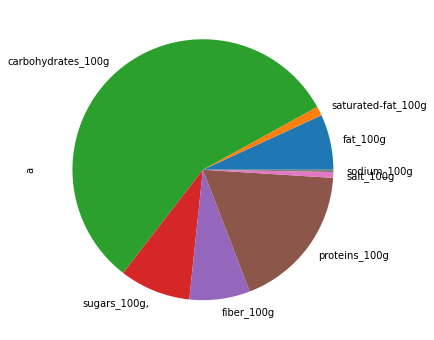

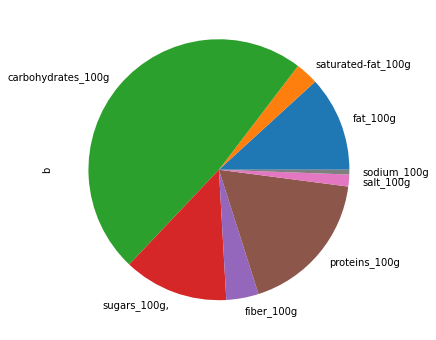

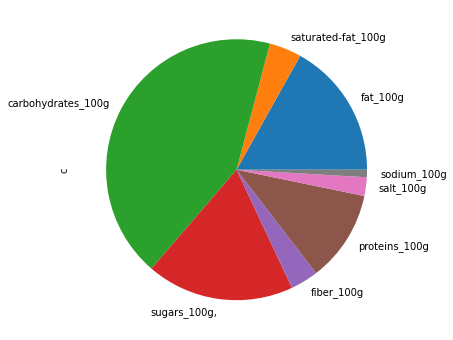

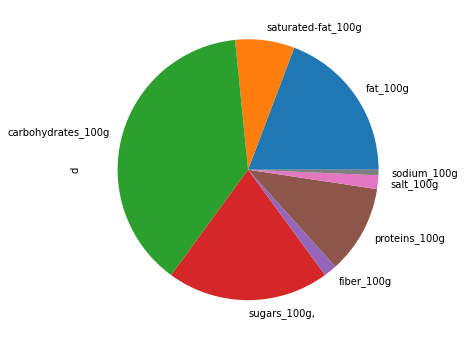

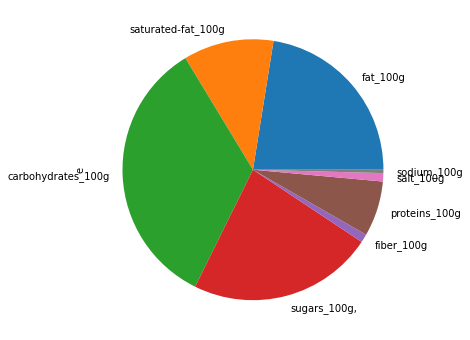

In [ ]:
pie_cat(letter_frame)

### Bar Graph (NRJ)

In [ ]:
#comparaison de l'apport energie pour chaque catégorie
a_ener=scor_A['energy-kcal_100g'].mean()
b_ener=scor_B['energy-kcal_100g'].mean()
c_ener=scor_C['energy-kcal_100g'].mean()
d_ener=scor_D['energy-kcal_100g'].mean()
e_ener=scor_E['energy-kcal_100g'].mean()
hist_ener = pd.DataFrame({'A':a_ener,'B':b_ener, 'C':c_ener, 'D':d_ener, 'E':e_ener},index = ['moyenne'] )
hist_ener


,A,B,C,D,E
moyenne,158.563741,142.417752,215.717107,322.071527,402.418466


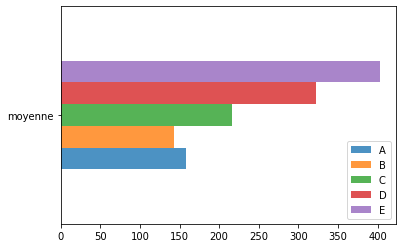

In [ ]:
#Apport energie pour chaque catégorie
hist_ener.plot.barh(alpha = 0.8)

### Violon pour chaque catégorie

In [ ]:
frame_violon=final_data.copy()
frame_violon= frame_violon.sort_values(by=['nutriscore_grade'])
frame_violon=frame_violon.reset_index(drop=True)

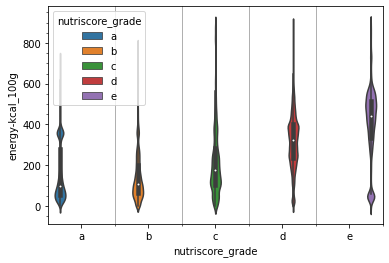

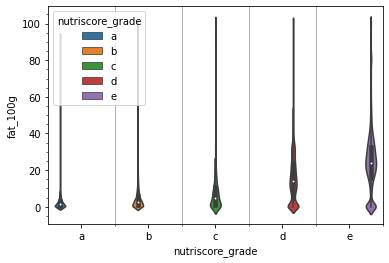

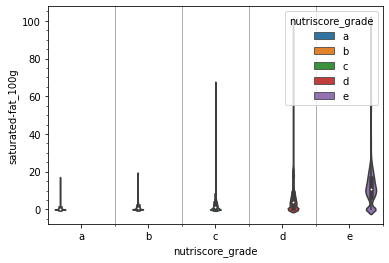

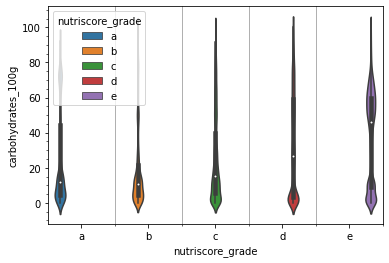

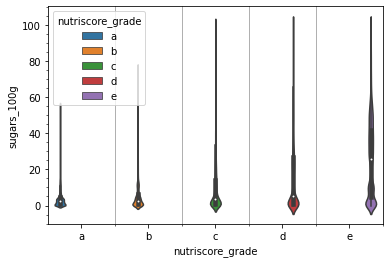

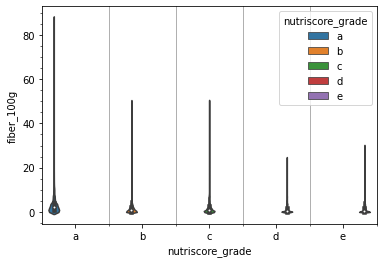

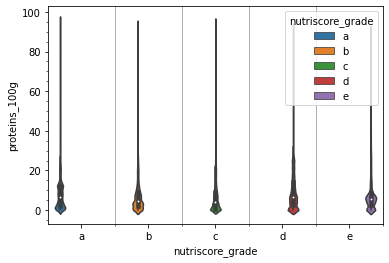

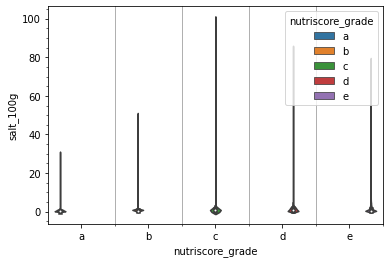

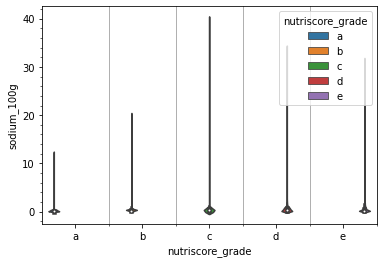

In [ ]:
#tracer graphe violon par indicateur pour chaque catégorie 

list_ind = ['energy-kcal_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g','fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g']

for ind in list_ind:
  x=ind
  vio = sns.violinplot("nutriscore_grade", x, data=frame_violon, hue='nutriscore_grade')
  vio.minorticks_on()
  vio.xaxis.set_minor_locator(AutoMinorLocator(2))
  vio.grid(which='minor', axis='x', linewidth=1)
  plt.show()

#Analyse Statistique


###Test de Kolmogorov-Smirnov 

In [ ]:
list_ind = ['energy-kcal_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g','fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g']

In [ ]:
#fonction pour réaliser le test de Kolmoborov smirnoff avec en entrée le frame et la valeur alpha pour le seuil du p_value
def test_ks(frame,alpha): 
  for ind in list_ind:
    print (ind)
    stat_ks , p_ks = st.kstest(frame[ind], 'norm')
    print(stat_ks,p_ks)
    if p_ks < alpha:
      print(ind,'ne suit pas une loi normale')

In [ ]:
test_ks(final_data,0.05)

energy-kcal_100g
0.9876496510822933 0.0
energy-kcal_100g ne suit pas une loi normale
fat_100g
0.6664016759869094 0.0
fat_100g ne suit pas une loi normale
saturated-fat_100g
0.5 0.0
saturated-fat_100g ne suit pas une loi normale
carbohydrates_100g
0.8289920979955727 0.0
carbohydrates_100g ne suit pas une loi normale
sugars_100g
0.6438859198063176 0.0
sugars_100g ne suit pas une loi normale
fiber_100g
0.5 0.0
fiber_100g ne suit pas une loi normale
proteins_100g
0.7210571891490327 0.0
proteins_100g ne suit pas une loi normale
salt_100g
0.5 0.0
salt_100g ne suit pas une loi normale
sodium_100g
0.5 0.0
sodium_100g ne suit pas une loi normale


In [ ]:
def distrib (frame,liste_catégorie):
  import random
  #v = [random.gauss(50, 10) for i in range(300)]
  for cat in liste_catégorie:
      print(cat)
      
      sns.distplot(frame[cat],color = 'green', rug = False, kde_kws = {'color': 'red', 'lw': 1}) 
      
      plt.show()

energy-kcal_100g


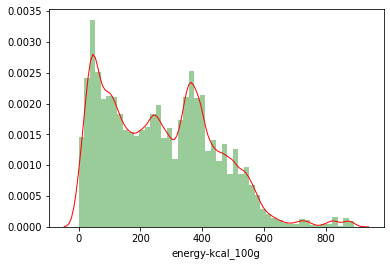

fat_100g


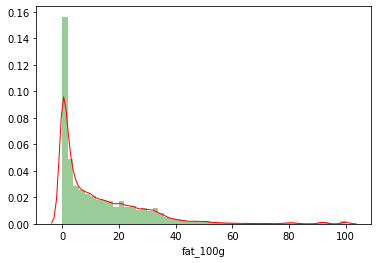

saturated-fat_100g


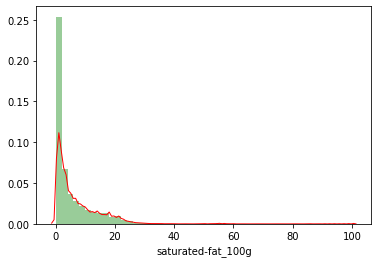

carbohydrates_100g


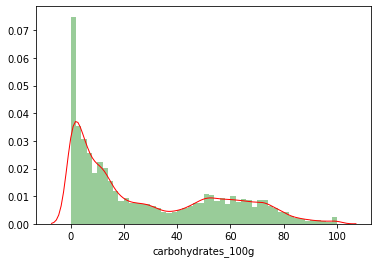

sugars_100g


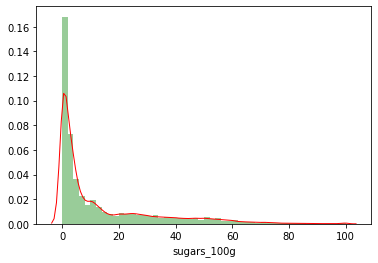

fiber_100g


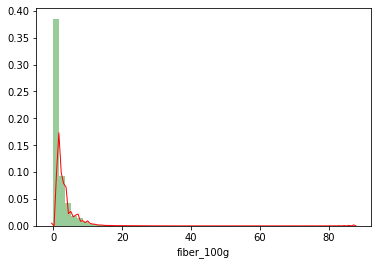

proteins_100g


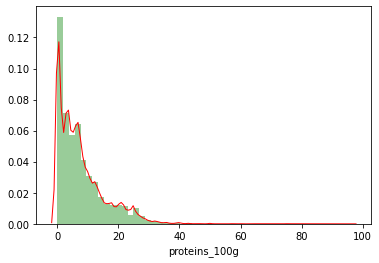

salt_100g


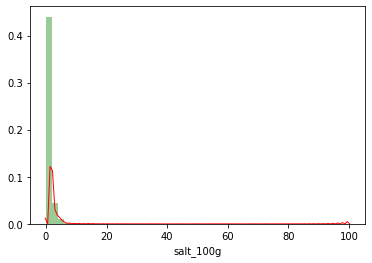

sodium_100g


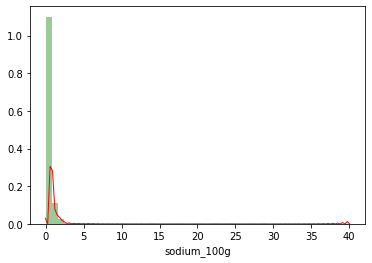

In [ ]:
distrib(final_data,list_ind)

###coeficient de pearson r

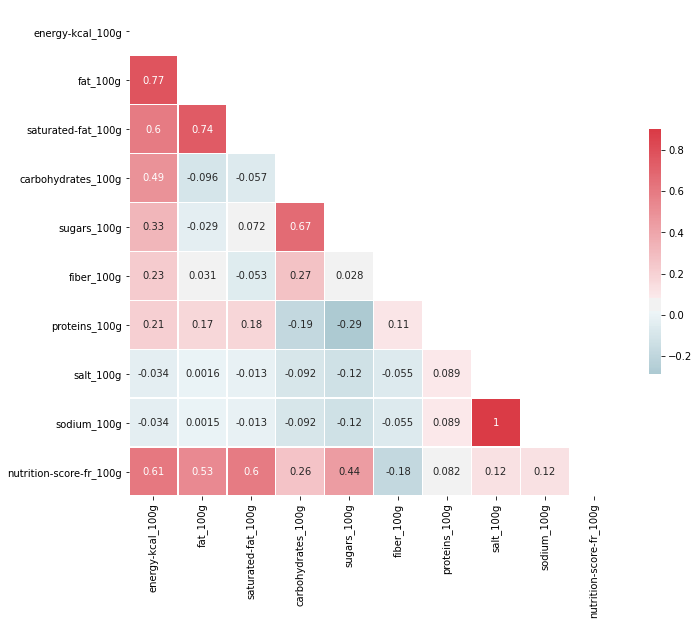

In [ ]:
final_data_pears=final_data.corr(method='pearson')
#coupe en deux le heatmap
mask = np.triu(np.ones_like(final_data_pears, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))

# couleur
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(final_data_pears, mask=mask, cmap=cmap, vmax=0.9, center=0.05,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [ ]:
#calcul du coef de pearson et de sa p-value

indi1=[]
indi2=[]
pears_R=[]
p_Value = []

for x in range(len(list_categorie)):
  for y in range(len(list_categorie)):
    if x != y:
      indi1.append(list_categorie[x])
      indi2.append(list_categorie[y])
      pears_R.append(st.pearsonr(final_data[list_categorie[x]],final_data[list_categorie[y]])[0])
      p_Value.append(st.pearsonr(final_data[list_categorie[x]],final_data[list_categorie[y]])[1])

frame_pears = pd.DataFrame()
frame_pears['indicateur 1']= indi1
frame_pears['indicateur 2']= indi2
frame_pears['Coef R']= pears_R
frame_pears['p_value']= p_Value  

frame_pears

,indicateur 1,indicateur 2,Coef R,p_value
0,energy-kcal_100g,fat_100g,0.772468,0.000000e+00
1,energy-kcal_100g,saturated-fat_100g,0.596242,0.000000e+00
2,energy-kcal_100g,carbohydrates_100g,0.494437,0.000000e+00
3,energy-kcal_100g,sugars_100g,0.330698,0.000000e+00
4,energy-kcal_100g,fiber_100g,0.270399,0.000000e+00
5,energy-kcal_100g,proteins_100g,0.215378,0.000000e+00
6,energy-kcal_100g,salt_100g,-0.032871,2.814534e-63
7,energy-kcal_100g,sodium_100g,-0.032878,2.648668e-63
8,energy-kcal_100g,nutrition-score-fr_100g,0.610751,0.000000e+00
9,fat_100g,energy-kcal_100g,0.772468,0.000000e+00


### ANOVA (entre les indicateurs et le Nutri-score)

In [ ]:
# x =  # qualitative
# y =  # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    


In [ ]:
eta_squared(final_data['nutriscore_grade'],final_data['energy-kcal_100g'])

0.3648351461340624

In [ ]:
eta_squared(final_data['nutrition-score-fr_100g'],final_data['energy-kcal_100g'])

0.4060138685559456

In [ ]:
list_ind = ['energy-kcal_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g','fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g']

for ind in list_ind:
  F, p = f_oneway(final_data.loc[final_data['nutriscore_grade']=='A',ind],final_data.loc[final_data['nutriscore_grade']=='B',ind],final_data.loc[final_data['nutriscore_grade']=='C',ind],final_data.loc[final_data['nutriscore_grade']=='D',ind],final_data.loc[final_data['nutriscore_grade']=='E',ind])
  print( 'Pour l\'indicateur :', ind,': p=', p)
  if p < 0.05:
    print('H0 est rejetée, les distributions n\'ont pas la même moyenne de population')


Pour l'indicateur : energy-kcal_100g : p= 0.0
H0 est rejetée, les distributions n'ont pas la même moyenne de population
Pour l'indicateur : fat_100g : p= 0.0
H0 est rejetée, les distributions n'ont pas la même moyenne de population
Pour l'indicateur : saturated-fat_100g : p= 0.0
H0 est rejetée, les distributions n'ont pas la même moyenne de population
Pour l'indicateur : carbohydrates_100g : p= 0.0
H0 est rejetée, les distributions n'ont pas la même moyenne de population
Pour l'indicateur : sugars_100g : p= 0.0
H0 est rejetée, les distributions n'ont pas la même moyenne de population
Pour l'indicateur : fiber_100g : p= 0.0
H0 est rejetée, les distributions n'ont pas la même moyenne de population
Pour l'indicateur : proteins_100g : p= 0.0
H0 est rejetée, les distributions n'ont pas la même moyenne de population
Pour l'indicateur : salt_100g : p= 0.0
H0 est rejetée, les distributions n'ont pas la même moyenne de population
Pour l'indicateur : sodium_100g : p= 0.0
H0 est rejetée, les dist

energy-kcal_100g


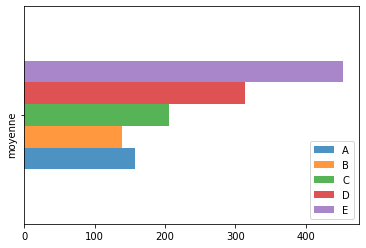

fat_100g


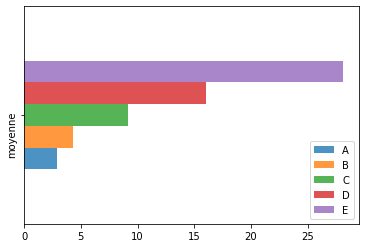

saturated-fat_100g


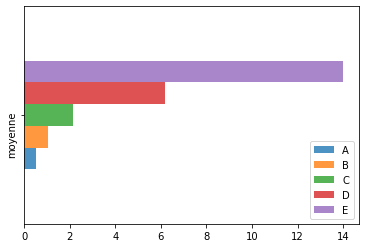

carbohydrates_100g


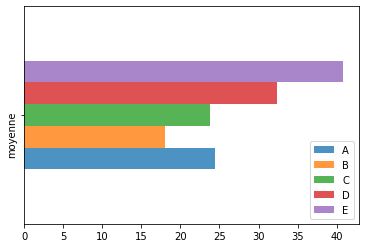

sugars_100g


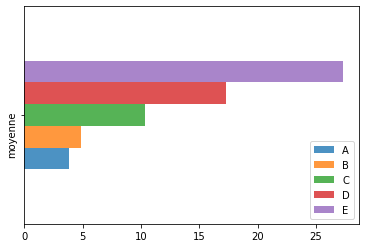

fiber_100g


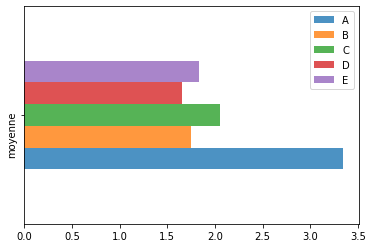

proteins_100g


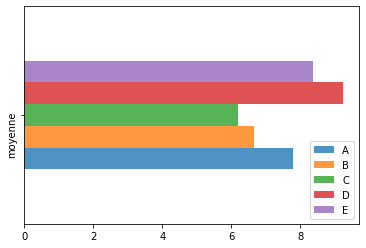

salt_100g


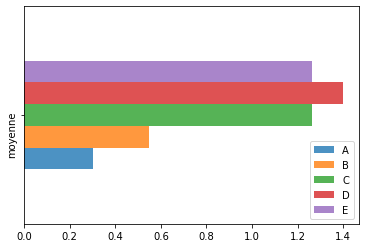

sodium_100g


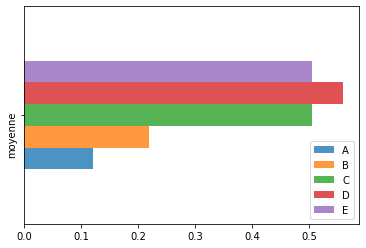

In [ ]:
#comparaison des moyennes des indicateurs pour chaque catégorie
for ind in list_ind:
  a_ener=scor_A[ind].mean()
  b_ener=scor_B[ind].mean()
  c_ener=scor_C[ind].mean()
  d_ener=scor_D[ind].mean()
  e_ener=scor_E[ind].mean()
  hist_ind = pd.DataFrame({'A':a_ener,'B':b_ener, 'C':c_ener, 'D':d_ener, 'E':e_ener},index = ['moyenne'] )
  print(ind)
  hist_ind.plot.barh(alpha = 0.8,rot=90)
  plt.show()

###Tableau de contingence et chi-2

In [ ]:
#Création de catégories pour l'indicateur 'fat_100g'
def cat_fat(frame):
  fat_catégories = []
  for scor in frame['fat_100g']:
    if scor >= frame['fat_100g'].min() and scor <= 25:
      fat_catégories.append('peu gras')
    if scor > 25 and scor <= 50:
      fat_catégories.append('moyennement gras')
    if scor > 50 and scor <= 75:
      fat_catégories.append('gras')
    if scor > 75 and scor <= frame['fat_100g'].max():
      fat_catégories.append('très gras')
  frame['catégorie fat_100g'] = fat_catégories
  return frame

In [ ]:
cat_fat(final_data)

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,product_name,nutriscore_grade,catégorie fat_100g
0,439.0000,10.53,1.75,75.44,17.54,5.30,7.0200,1.0525,4.210000e-01,8.0,"Maple pecan flakes & clusters cereal, maple pe...",c,peu gras
1,370.0000,20.00,13.00,39.00,8.20,1.62,7.2000,1.0000,4.000000e-01,19.0,Croissant pur beurre,e,peu gras
2,229.0000,9.69,3.08,19.82,1.32,0.40,14.5400,1.5650,6.260000e-01,11.0,Applewood ham and swiss hoagie,d,peu gras
3,300.0000,21.25,7.50,23.75,2.50,1.20,3.7500,0.9700,3.880000e-01,13.0,Stuffed jalapenos with cream cheese,d,peu gras
4,36.0000,0.00,0.00,8.80,3.20,3.20,0.8000,0.0100,4.000000e-03,-8.0,100% pure pumpkin,a,peu gras
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262442,566.0000,37.00,21.00,53.00,53.00,0.00,4.7000,0.2000,8.000000e-02,27.0,Kruger Czekolada Shogetten-kids,e,moyennement gras
262443,572.0000,42.00,26.00,34.00,28.00,11.00,9.0000,0.0200,8.000000e-03,18.0,Chocolate negro mascao,d,moyennement gras
262444,467.0000,20.00,16.67,70.00,43.33,0.00,6.6700,1.1675,4.670000e-01,29.0,"Frosted pretzels, frosted",e,peu gras
262445,163.1004,4.60,1.10,26.00,3.70,1.30,3.5000,1.6002,6.400800e-01,7.0,Banh Cuon,c,peu gras


In [ ]:
#création du tableau de contingence entre le nutri_score et le fat_100g
frame_contingence = final_data.copy()
X = "nutriscore_grade"
Y = "catégorie fat_100g"
cont = frame_contingence[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).astype(int)
cont=cont.reindex(columns=['peu gras','moyennement gras','gras','très gras'])
cont

catégorie fat_100g,peu gras,moyennement gras,gras,très gras
nutriscore_grade,,,,
a,40017,240,255,3
b,34420,329,198,7
c,51516,2400,563,1265
d,62615,16243,1282,978
e,27479,19914,1358,1365


In [ ]:
#test du chi-2
st_chi2, st_p, st_dof, st_exp = chi2_contingency(cont)
print ('chi2 =', st_chi2)
print ('p_value =', st_p)
print ('degré de liberté =', st_dof)

#fréquences attendues si H0
norm = st_exp
st_exp_norm=pd.DataFrame(norm,index = [cont.index],columns = [cont.columns])
st_exp_norm

chi2 = 47542.65839547833
p_value = 0.0
degré de liberté = 12


catégorie fat_100g,peu gras,moyennement gras,gras,très gras
nutriscore_grade,,,,
a,33352.045194,6040.038141,564.391439,558.525226
b,28774.216653,5210.995759,486.924309,481.863279
c,45888.594528,8310.400744,776.537983,768.466746
d,66776.532199,12093.195457,1130.008756,1118.263588
e,41255.611426,7471.369899,698.137513,690.881161


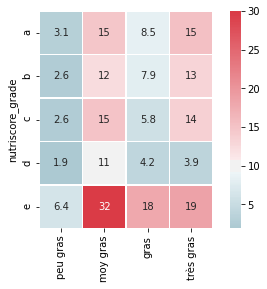

In [ ]:
#calcul du poucentage de différence entre les valeurs réelles et les valeurs attendus en cas d'indépendance 
peu_gras=[]
moy_gras=[]
g_gras=[]
tre_gras=[]
for i in range(len(cont)):
  peu_gras.append((cont.iloc[i,0]-st_exp_norm.iloc[i,0])/st_exp_norm.iloc[:,0].sum()*100)
  moy_gras.append((cont.iloc[i,1]-st_exp_norm.iloc[i,1])/st_exp_norm.iloc[:,1].sum()*100)
  g_gras.append((cont.iloc[i,2]-st_exp_norm.iloc[i,2])/st_exp_norm.iloc[:,2].sum()*100)
  tre_gras.append((cont.iloc[i,3]-st_exp_norm.iloc[i,3])/st_exp_norm.iloc[:,3].sum()*100)

diff_chi2=pd.DataFrame()
diff_chi2['peu gras']=peu_gras
diff_chi2['moy gras']=moy_gras
diff_chi2['gras']=g_gras
diff_chi2['très gras']=tre_gras
diff_chi2=diff_chi2.set_index(cont.index)
diff_chi2=diff_chi2.abs()

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(diff_chi2, cmap=cmap, vmax=30, center=10,
            square=True, linewidths=.5, cbar_kws={"shrink": 1}, annot=True)

#ACP

### Fonctions outils

In [ ]:
#fonction affichant le cercle de corrélation
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie 
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

In [ ]:
#fonction Eboulis des valeurs
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [ ]:
#fonction plan factoriel
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()
            
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

In [ ]:
# fonction plan factoriel en 3D

def plan_fact_cat(frame,f1,f2):
 
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure().gca(projection='3d')

  tmp_arr = frame['nutriscore_grade'][:]
  tmp_arr[tmp_arr == 'A'] = 1
  tmp_arr[tmp_arr == 'B'] = 2
  tmp_arr[tmp_arr == 'C'] = 3
  tmp_arr[tmp_arr == 'D'] = 4
  tmp_arr[tmp_arr == 'E'] = 5


  fig.scatter(tmp_arr, frame[f1], frame[f2], c=tmp_arr, cmap="viridis")
  print('plan',f1,f2)
  plt.xlabel("Catégorie")
  plt.ylabel(f1)
  plt.show()


### Fonction ACP pour analyse

In [ ]:
#Fonction pour calculer les composantes principales, tracer les cercles de corrélation et les éboulis de valeurs propres

def ACP_cercle_ebou (frame,nb_comp,liste_indicateurs):

# choix du nombre de composantes à calculer
  n_comp = nb_comp 

# selection des colonnes de variable quantitative à prendre en compte dans l'ACP
  data_pca = frame[liste_indicateurs] 

# préparation des données pour l'ACP
  X = data_pca.values
  names = frame.index
  features = liste_indicateurs

# Centrage et Réduction
  std_scale = preprocessing.StandardScaler().fit(X)
  X_scaled = std_scale.transform(X)

# Calcul des composantes principales
  pca = decomposition.PCA(n_components=n_comp)
  X_project = pca.fit_transform(X_scaled) 

#frame avec les composantes principales
  data_ACP = pd.DataFrame(X_project, index= frame.index, columns= ["F"+str(i+1) for i in range(n_comp)])
  data_ACP['nutriscore_grade']=frame['nutriscore_grade']

# Eboulis des valeurs propres
  display_scree_plot(pca)

# Cercle des corrélations
  pcs = pca.components_
  display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

#Coefficient des composantes principales
  for i in range(n_comp):
    print("F"+str(i+1))
    print(pcs[i])

  plt.show()
  return data_ACP

In [ ]:
list_ind = ['energy-kcal_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g','fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g']

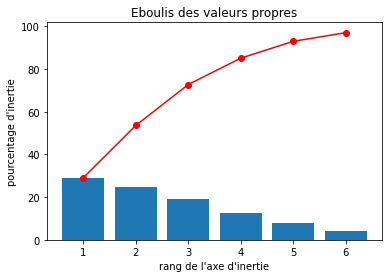

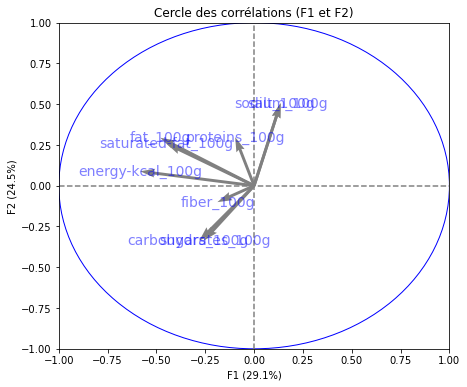

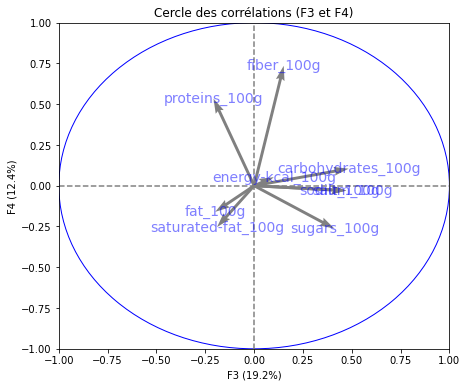

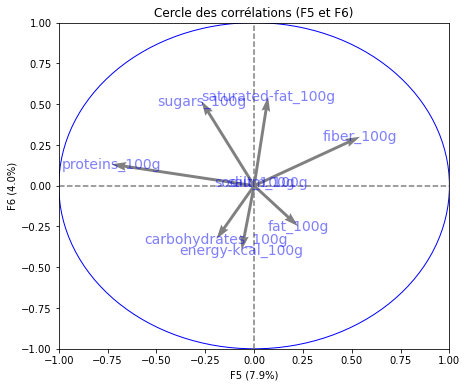

F1
[-0.58360154 -0.48053281 -0.44887428 -0.28077884 -0.25778671 -0.18806402
 -0.09704156  0.13589086  0.13589386]
F2
[ 0.08857715  0.29410499  0.25859484 -0.33748973 -0.33677415 -0.10058711
  0.29835986  0.50613223  0.50612518]
F3
[ 0.10106354 -0.19898176 -0.18980715  0.48386642  0.41068706  0.15159487
 -0.20796514  0.47177168  0.47177968]
F4
[ 0.05257184 -0.15995172 -0.25351738  0.1045172  -0.2624665   0.73527334
  0.53396809 -0.03015948 -0.03016086]
F5
[-0.06414853  0.22479745  0.07145847 -0.19297561 -0.26993133  0.54248385
 -0.73014603  0.03701262  0.03701839]
F6
[-0.39542928 -0.24812636  0.54526443 -0.32687279  0.51906289  0.30031161
  0.13158207  0.02216012  0.02217259]


,F1,F2,F3,F4,F5,F6,nutriscore_grade
0,0.159981,-0.745082,0.758177,1.775052,0.476913,-0.003704,A
1,-1.431100,-0.978256,1.021826,0.625274,0.050370,0.158772,D
2,1.703884,-0.384422,-0.780374,-0.577176,0.179234,0.121093,B
3,1.358957,-0.515610,-0.567768,-0.687321,0.083898,0.189874,C
4,1.641058,0.900031,-0.793018,0.687510,-1.223855,0.242527,C
...,...,...,...,...,...,...,...
260805,0.965148,0.178340,-0.754298,-0.549884,0.299282,0.048290,C
260806,1.767856,-0.415839,-0.790407,-0.544375,0.209389,0.133353,B
260807,1.829544,-0.537284,-0.660707,-0.532210,0.146936,0.040699,B
260808,-1.154780,2.040295,-1.538748,-0.099450,-0.568816,0.737993,D


In [ ]:
data_ACP_global6=ACP_cercle_ebou (final_data,6,list_ind)
data_ACP_global6

Text(0, 0.5, 'F2')

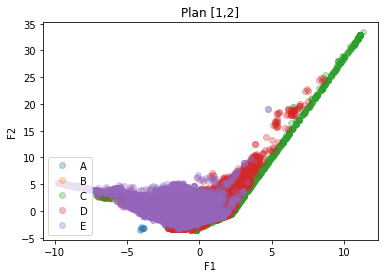

In [ ]:
#plan factoriel
F_A=data_ACP_global6.loc[data_ACP_global6['nutriscore_grade']=='A',['F1','F2','F3','F4','F5','F6']]
F_B=data_ACP_global6.loc[data_ACP_global6['nutriscore_grade']=='B',['F1','F2','F3','F4','F5','F6']]
F_C=data_ACP_global6.loc[data_ACP_global6['nutriscore_grade']=='C',['F1','F2','F3','F4','F5','F6']]
F_D=data_ACP_global6.loc[data_ACP_global6['nutriscore_grade']=='D',['F1','F2','F3','F4','F5','F6']]
F_E=data_ACP_global6.loc[data_ACP_global6['nutriscore_grade']=='E',['F1','F2','F3','F4','F5','F6']]

plt.plot(F_A['F1'], F_A['F2'],'o',label='A',alpha=0.3)
plt.plot(F_B['F1'], F_B['F2'],'o',label='B',alpha=0.3)
plt.plot(F_C['F1'], F_C['F2'],'o',label='C',alpha=0.3)
plt.plot(F_D['F1'], F_D['F2'],'o',label='D',alpha=0.3)
plt.plot(F_E['F1'], F_E['F2'],'o',label='E',alpha=0.3)

plt.title('Plan [1,2]')
plt.legend(loc='lower left')
plt.xlabel("F1")
plt.ylabel("F2")


In [ ]:
#plan factoriel 3D

plan F1 F2


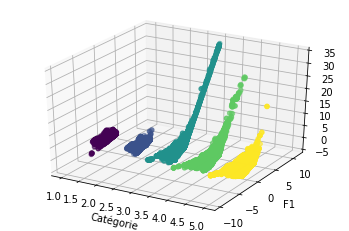

In [ ]:
plan_fact_cat(data_ACP_global6,'F1','F2')

plan F3 F4


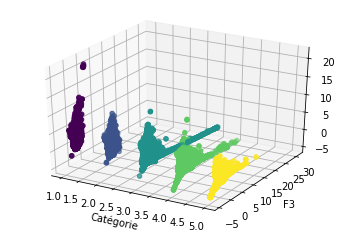

In [ ]:
plan_fact_cat(data_ACP_global6,'F3','F4')

plan F5 F6


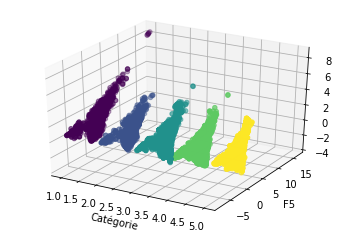

In [ ]:
plan_fact_cat(data_ACP_global6,'F5','F6')

In [ ]:
#Fonction pour calculer les composantes principales, tracer les cercles de corrélation ,les éboulis de valeurs propres et les plans factoriels par catégorie

def ACP_par_scor (list_frame,nb_comp,liste_indicateurs):
  for frame in list_frame:
    print('Pour la catégorie {}'.format(frame['nutriscore_grade'].unique()))
  # choix du nombre de composantes à calculer
    n_comp = nb_comp 

  # selection des colonnes de variable quantitative à prendre en compte dans l'ACP
    data_pca = frame[liste_indicateurs] 

  # préparation des données pour l'ACP
    X = data_pca.values
    names = frame.index
    features = liste_indicateurs

  # Centrage et Réduction
    std_scale = preprocessing.StandardScaler().fit(X)
    X_scaled = std_scale.transform(X)

  # Calcul des composantes principales
    pca = decomposition.PCA(n_components=n_comp)
    X_project = pca.fit_transform(X_scaled) 

  #frame avec les composantes principales
    data_ACP = pd.DataFrame(X_project, index= frame.index, columns= ["F"+str(i+1) for i in range(n_comp)])
    
  # Eboulis des valeurs propres
    display_scree_plot(pca)

  # Cercle des corrélations
    pcs = pca.components_
    display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

  #Coefficient des composantes principales
    for i in range(n_comp):
      print("F"+str(i+1))
      print(pcs[i])

  # Projection des individus
    X_projected = pca.transform(X_scaled)#pca a garder en mémoire les différents axes principaux d'inerties
    display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

    plt.show()
  return data_ACP

In [ ]:
letter_frame=[scor_A,scor_B,scor_C,scor_D,scor_E]

Pour la catégorie ['A']


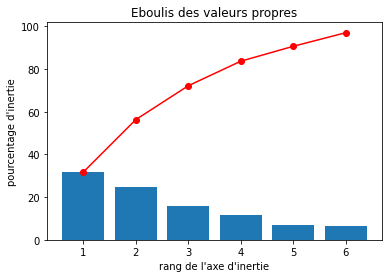

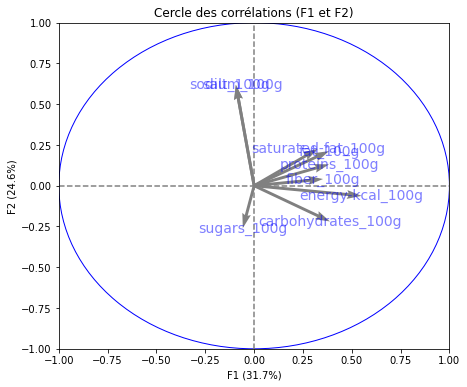

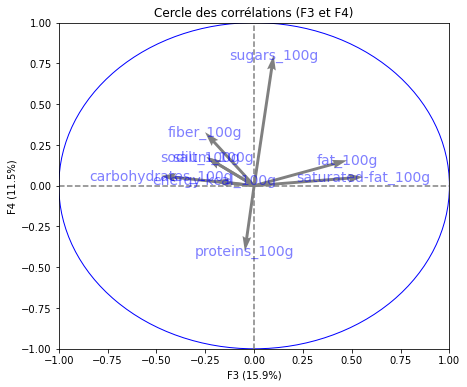

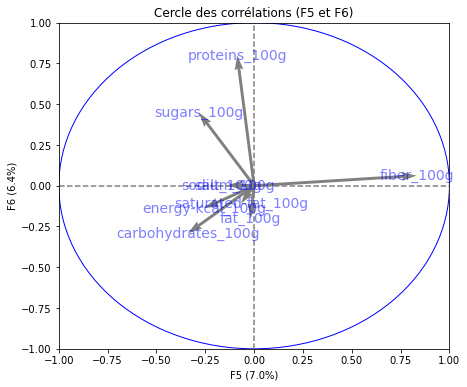

F1
[ 0.55050246  0.3838828   0.32588455  0.38820925 -0.0579593   0.35298781
  0.38363267 -0.09364723 -0.09365023]
F2
[-0.06220118  0.21253332  0.22608812 -0.21912878 -0.26007182  0.04118936
  0.13109086  0.6185827   0.61859846]
F3
[-0.20426426  0.47568653  0.55766946 -0.47613361  0.09981644 -0.25131048
 -0.0475273  -0.24386782 -0.2438224 ]
F4
[ 0.02984935  0.15570545  0.05345733  0.06019326  0.79912024  0.3283098
 -0.40079409  0.1751841   0.17515151]
F5
[-0.25583578 -0.01873683 -0.06772001 -0.33905417 -0.28250604  0.83111333
 -0.08690555 -0.13517402 -0.13516518]
F6
[-0.13779027 -0.20124473 -0.10921795 -0.29183382  0.44772544  0.06193666
  0.79943941  0.00326131  0.00326097]


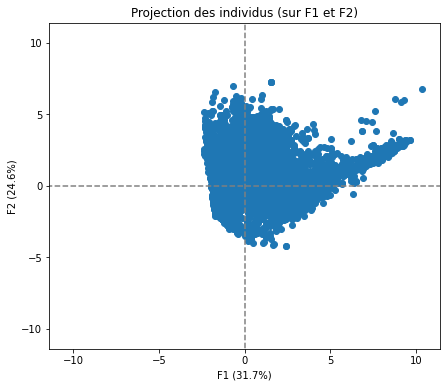

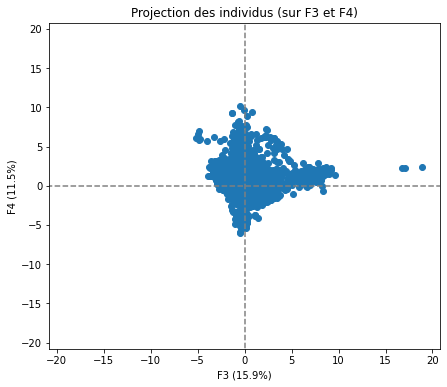

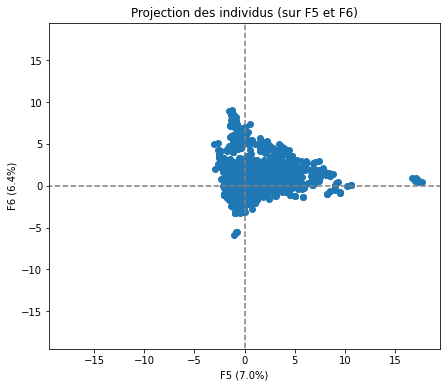

Pour la catégorie ['B']


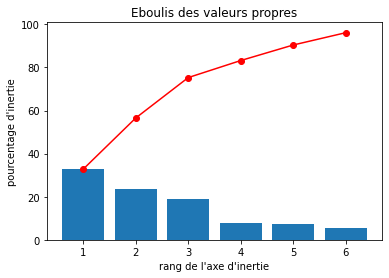

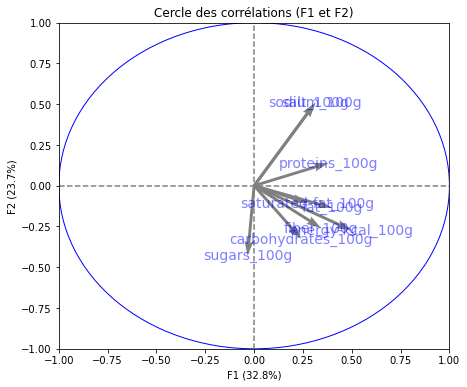

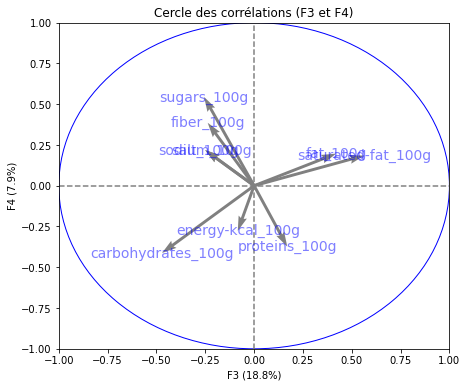

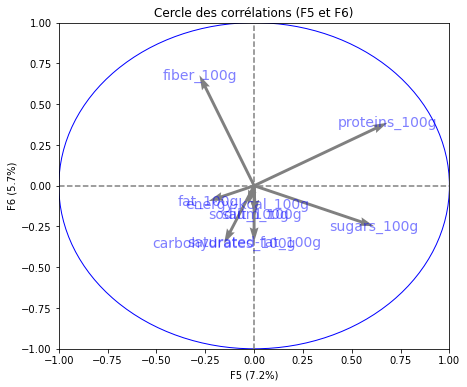

F1
[ 0.4974618   0.39864694  0.27335692  0.24222078 -0.03350747  0.3428268
  0.38085035  0.31345651  0.31346852]
F2
[-0.27297714 -0.13566011 -0.10636526 -0.3260522  -0.42981993 -0.25908573
  0.1399262   0.50892121  0.50892582]
F3
[-0.08371777  0.41967705  0.56368087 -0.47161218 -0.25620519 -0.23779475
  0.16967081 -0.25074517 -0.2507181 ]
F4
[-0.27682808  0.19636657  0.18482827 -0.41244219  0.54433558  0.38598314
 -0.37372192  0.21862674  0.21860101]
F5
[-3.29717594e-02 -2.32831526e-01 -2.14163148e-04 -1.53720402e-01
  6.13889993e-01 -2.79969118e-01  6.82479677e-01  5.00810027e-03
  5.01152482e-03]
F6
[-0.11660646 -0.09407586 -0.34530678 -0.35377206 -0.24799117  0.67737621
  0.38604619 -0.17859827 -0.1785891 ]


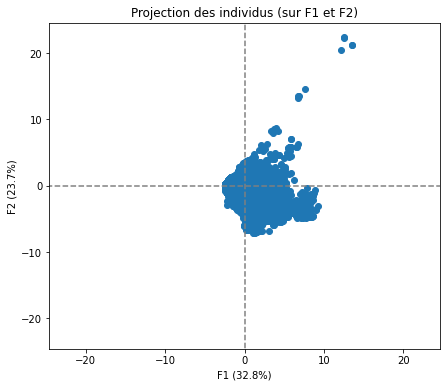

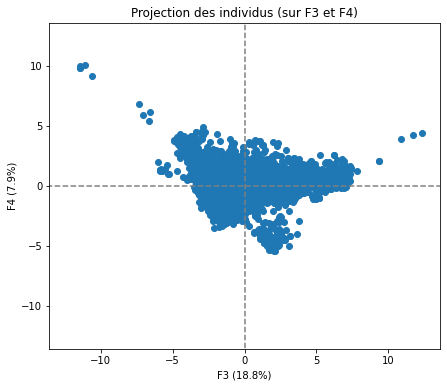

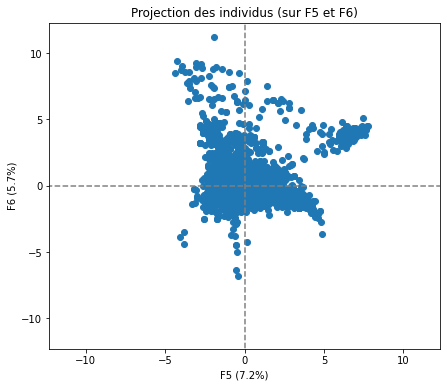

Pour la catégorie ['C']


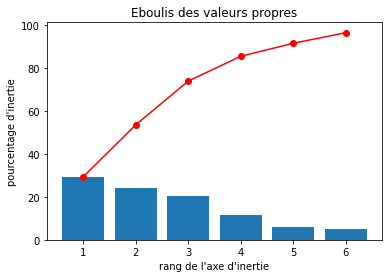

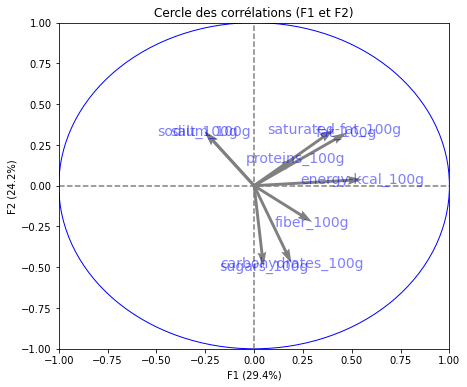

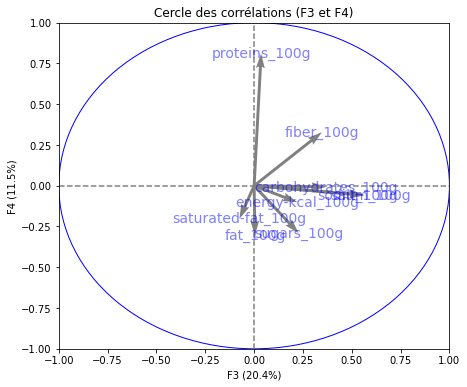

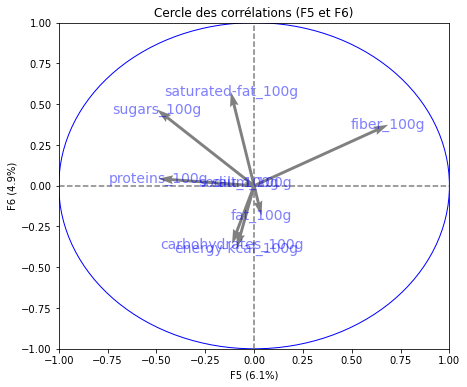

F1
[ 0.55428769  0.47432843  0.40783785  0.19164855  0.04805061  0.29758369
  0.21123144 -0.25420076 -0.25419512]
F2
[ 0.03803243  0.32534584  0.34378876 -0.47684172 -0.49618582 -0.22276612
  0.16863419  0.33382244  0.33381862]
F3
[ 0.22140218  0.00439179 -0.07535115  0.36901098  0.22788893  0.34699357
  0.03585852  0.5636867   0.56369182]
F4
[-0.10117177 -0.30409178 -0.20275856 -0.00722704 -0.29030429  0.32763469
  0.81102373 -0.05808324 -0.05809456]
F5
[-0.08898606  0.037743   -0.11950326 -0.11303237 -0.4970037   0.68668905
 -0.4901538  -0.0489519  -0.04896983]
F6
[-0.38234818 -0.18333624  0.57582231 -0.35744789  0.46722261  0.37395956
  0.04342157  0.02035552  0.02036816]


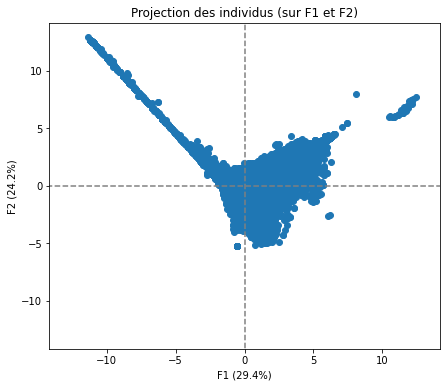

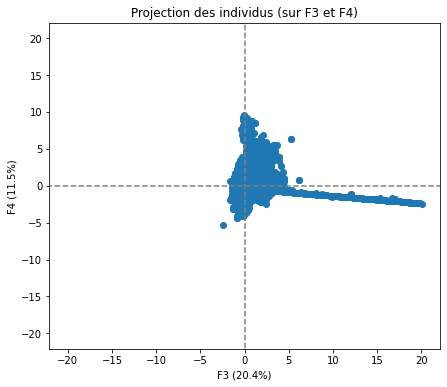

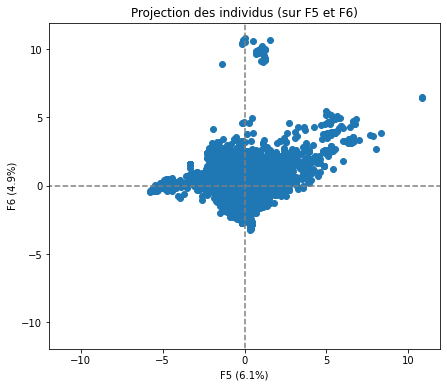

Pour la catégorie ['D']


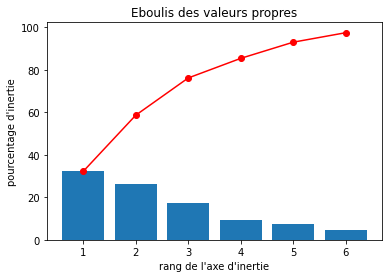

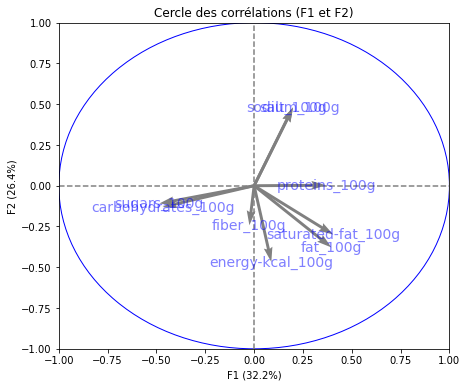

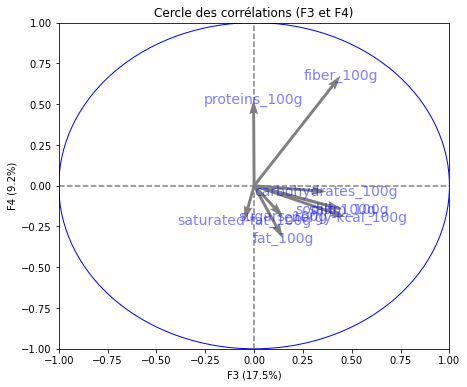

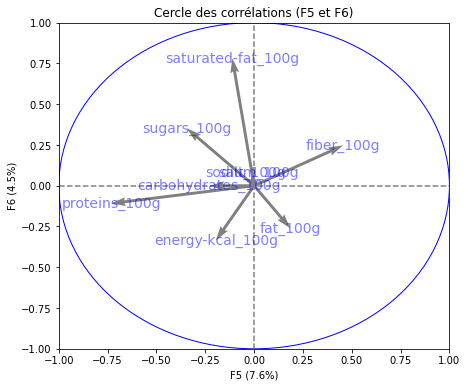

F1
[ 0.08810443  0.39567258  0.40521866 -0.46909406 -0.48570564 -0.02433185
  0.36836226  0.19904318  0.1990439 ]
F2
[-0.46755628 -0.37837735 -0.29954385 -0.13054686 -0.10927181 -0.24271925
  0.00279868  0.47988933  0.47989388]
F3
[ 0.46675979  0.14704542 -0.05043603  0.36983088  0.14868891  0.44288155
 -0.00290133  0.44885333  0.4488475 ]
F4
[-0.19165643 -0.32160618 -0.21352888 -0.03663374 -0.19128324  0.67526431
  0.52789139 -0.14433093 -0.14432168]
F5
[-0.19579076  0.18470644 -0.11172496 -0.22903651 -0.34400709  0.45541697
 -0.73256108 -0.01043176 -0.01045338]
F6
[-3.34947829e-01 -2.60477256e-01  7.81554233e-01 -7.73671782e-04
  3.51122684e-01  2.46963144e-01 -1.08765047e-01  8.07063423e-02
  8.07009985e-02]


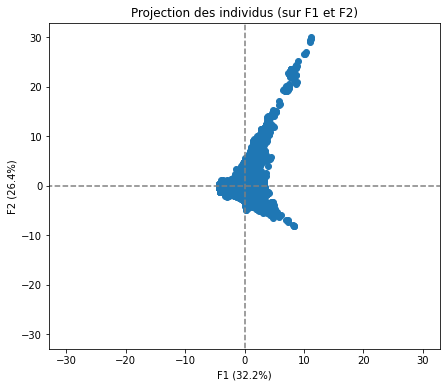

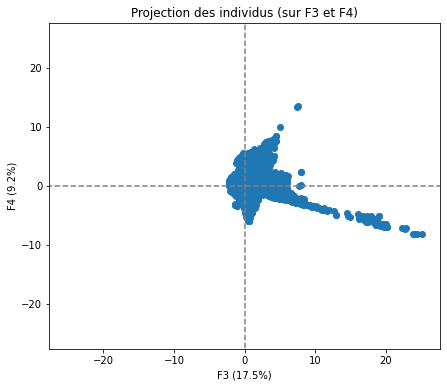

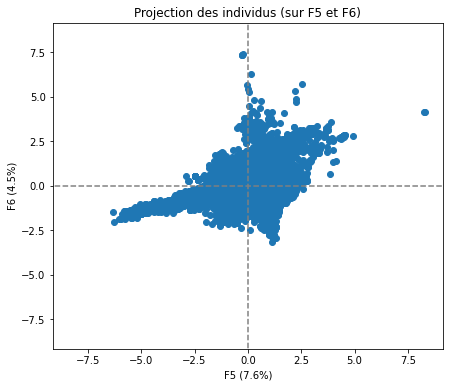

Pour la catégorie ['E']


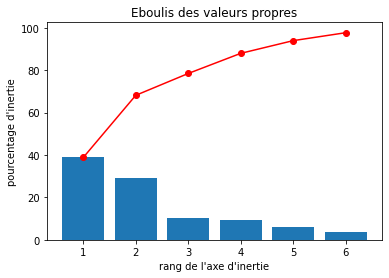

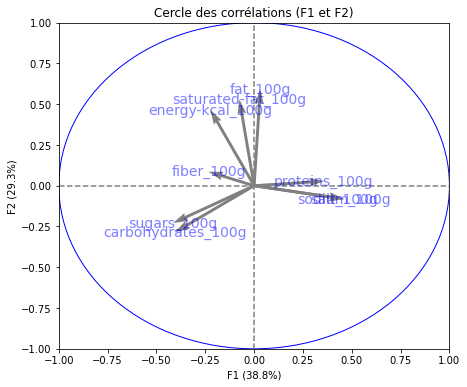

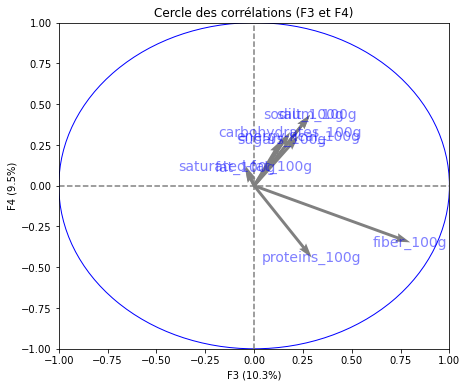

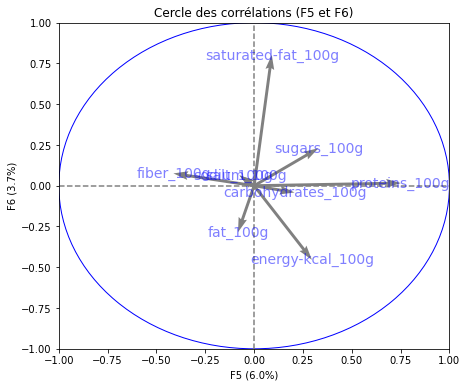

F1
[-0.2237387   0.03145329 -0.07537475 -0.40549084 -0.41529421 -0.23366802
  0.35739441  0.46045821  0.46046168]
F2
[ 0.46477368  0.59144049  0.52836813 -0.28487313 -0.22888579  0.08575685
  0.02772841 -0.08168275 -0.08169522]
F3
[ 0.22789801 -0.04692011 -0.04452603  0.18430764  0.14044862  0.79956304
  0.2952023   0.28612532  0.28612962]
F4
[ 0.30533876  0.10952736  0.12169463  0.32882088  0.2808363  -0.34737037
 -0.44078076  0.43476319  0.43473823]
F5
[ 0.29598534 -0.08254684  0.0904961   0.20680031  0.32887122 -0.41334494
  0.75125452 -0.07492766 -0.07493303]
F6
[-0.45457278 -0.28492566  0.80231484 -0.04159507  0.22976368  0.07557802
  0.01619118  0.06315942  0.06314309]


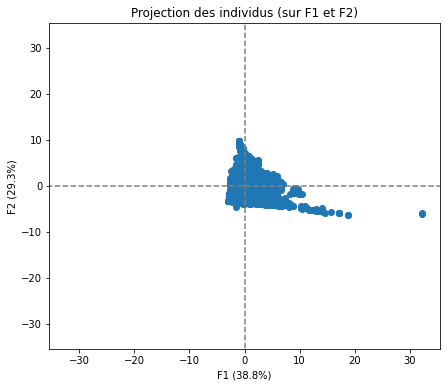

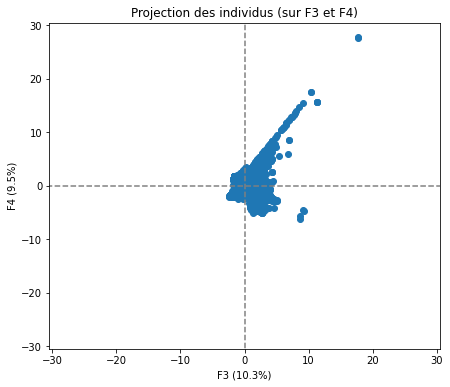

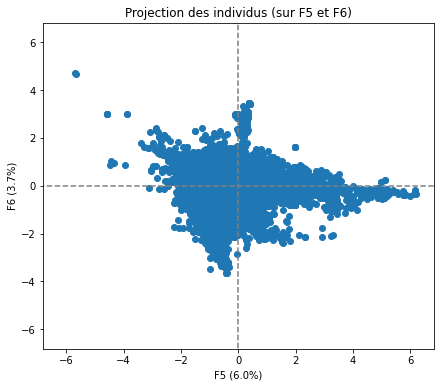

,F1,F2,F3,F4,F5,F6
0,2.513335,0.099264,-0.602010,-0.662964,-0.097501,0.035128
1,-1.422915,-2.384362,-0.909756,0.495248,0.018801,0.061755
2,-0.519373,-1.418434,-0.330531,-0.494387,-0.213609,0.202106
3,2.355108,-0.909853,0.055632,-0.803571,-0.070775,0.184496
4,-0.949578,-0.925655,-0.792035,0.497781,0.287972,-0.025661
...,...,...,...,...,...,...
42936,2.733672,-0.530684,-0.646530,-0.505859,-0.558645,0.029822
42937,0.677095,2.592030,-1.058234,0.609831,-0.910539,-2.348368
42938,0.960761,0.646014,-0.152241,1.486372,-0.318032,-1.105069
42939,3.455381,-0.728789,0.052154,0.089407,-0.045980,0.666260


In [ ]:
ACP_par_scor (letter_frame,6,list_ind)

#Modélisation du Nutri-score

### Préparation du dataset avant modélisation

In [ ]:
#chargement du set de train
train_data_clean=pd.read_csv("train_data_clean.csv",sep = '\t',low_memory=False)

In [ ]:
#dataset complet pour modélisation train
def form_data_mod_train(datafram):

  from sklearn.preprocessing import StandardScaler
  import pickle

  frame=datafram.copy()

  data_final_acp=pd.DataFrame()
  data_final_acp['energy-kcal_100g']=frame['energy-kcal_100g']
  data_final_acp['gras_100g']=frame['fat_100g']
  data_final_acp['sucre_100g']=frame['carbohydrates_100g']
  data_final_acp['fiber_100g']=frame['fiber_100g']
  data_final_acp['proteins_100g']=frame['proteins_100g']
  data_final_acp['sel_100g']=frame['salt_100g']
  
  #normalisation 
  scaler = StandardScaler()
  scal_value=scaler.fit_transform(data_final_acp[['energy-kcal_100g',	'gras_100g',	'sucre_100g',	'fiber_100g',	'proteins_100g',	'sel_100g']])
  pickle.dump(scaler, open('scaler_mod.pickle', 'wb'))
  print('le scaler est sauvegarder sous : scaler_mod.pickle')

  #data_set normé
  colon_name=['energy-kcal_100g',	'gras_100g',	'sucre_100g',	'fiber_100g',	'proteins_100g',	'sel_100g']
  data_scal_frame=pd.DataFrame(scal_value,columns=colon_name)
  data_scal_frame['nutrition-score-fr_100g']=frame['nutrition-score-fr_100g']
  data_scal_frame['nutriscore_grade']=frame['nutriscore_grade']
  data_scal_frame=data_scal_frame.set_index(frame['product_name'])
  data_scal_frame=data_scal_frame.reset_index(drop=False)
  
  return data_scal_frame

In [ ]:
set_train=form_data_mod_train(train_data_clean)
set_train

le scaler est sauvegarder sous : scaler_mod.pickle


,product_name,energy-kcal_100g,gras_100g,sucre_100g,fiber_100g,proteins_100g,sel_100g,nutrition-score-fr_100g,nutriscore_grade
0,"Maple pecan flakes & clusters cereal, maple pe...",0.978736,-0.149837,1.714072,1.242838,-0.100180,-0.006585,8.0,c
1,Croissant pur beurre,0.589148,0.441499,0.375711,-0.054356,-0.078562,-0.023406,19.0,e
2,Applewood ham and swiss hoagie,-0.206967,-0.202290,-0.328728,-0.484404,0.802976,0.157623,11.0,d
3,Stuffed jalapenos with cream cheese,0.193913,0.519552,-0.184387,-0.202405,-0.492909,-0.033018,13.0,d
4,100% pure pumpkin,-1.296685,-0.807363,-0.733468,0.502591,-0.847206,-0.340609,-8.0,a
...,...,...,...,...,...,...,...,...,...
262442,Kruger Czekolada Shogetten-kids,1.695804,1.503031,0.889901,-0.625403,-0.378814,-0.279731,27.0,e
262443,Chocolate negro mascao,1.729681,1.815246,0.192072,3.252078,0.137619,-0.337405,18.0,d
262444,"Frosted pretzels, frosted",1.136830,0.441499,1.514273,-0.625403,-0.142216,0.030262,29.0,e
262445,Banh Cuon,-0.579050,-0.520125,-0.101750,-0.167156,-0.522934,0.168902,7.0,c


In [ ]:
#chargement du set de test
test_data_clean=pd.read_csv("test_data_clean.csv",sep = '\t',low_memory=False)

In [ ]:
#dataset complet pour modélisation test
def form_data_mod_test(datafram,scaler_save):

  from sklearn.preprocessing import StandardScaler
  import pickle

  frame=datafram.copy()

  data_final_acp=pd.DataFrame()
  data_final_acp['energy-kcal_100g']=frame['energy-kcal_100g']
  data_final_acp['gras_100g']=frame['fat_100g']
  data_final_acp['sucre_100g']=frame['carbohydrates_100g']
  data_final_acp['fiber_100g']=frame['fiber_100g']
  data_final_acp['proteins_100g']=frame['proteins_100g']
  data_final_acp['sel_100g']=frame['salt_100g']
  
  #normalisation 
  scaler = pickle.load(open(scaler_save, 'rb'))
  scal_value=scaler.transform(data_final_acp[['energy-kcal_100g',	'gras_100g',	'sucre_100g',	'fiber_100g',	'proteins_100g',	'sel_100g']])

  #data_set normé
  colon_name=['energy-kcal_100g',	'gras_100g',	'sucre_100g',	'fiber_100g',	'proteins_100g',	'sel_100g']
  data_scal_frame=pd.DataFrame(scal_value,columns=colon_name)
  data_scal_frame['nutrition-score-fr_100g']=frame['nutrition-score-fr_100g']
  data_scal_frame['nutriscore_grade']=frame['nutriscore_grade']
  data_scal_frame=data_scal_frame.set_index(frame['product_name'])
  data_scal_frame=data_scal_frame.reset_index(drop=False)
  data_scal_frame=data_scal_frame.fillna(0)

  return data_scal_frame

In [ ]:
set_test=form_data_mod_test(test_data_clean,'scaler_mod.pickle')
set_test

,product_name,energy-kcal_100g,gras_100g,sucre_100g,fiber_100g,proteins_100g,sel_100g,nutrition-score-fr_100g,nutriscore_grade
0,Premium brussels sprouts,-1.268454,-0.807363,-0.711064,0.608341,-0.519331,-0.324588,-10.0,a
1,Mieszanka owoców w lekkim syropie,-1.116006,-0.782386,-0.469028,0.467341,-0.883236,-0.340609,-6.0,a
2,Tarte myrtilles,-0.252137,-0.326551,0.081889,0.044343,-0.546954,-0.276527,7.0,c
3,"Pierce's Markets, Jack Cheese, Pepper",0.719011,1.199557,-1.056673,-0.625403,2.059227,0.142404,15.0,d
4,Crème fraiche gastronomique,0.143098,1.065929,-0.950162,-0.625403,-0.667055,-0.321384,13.0,d
...,...,...,...,...,...,...,...,...,...
122945,Kluski noodles,0.719011,-0.472668,1.566794,0.643591,0.772951,-0.322185,-3.0,a
122946,Picnic mackerel salad,-0.415877,-0.008092,-0.762850,0.220593,0.209679,0.143205,3.0,c
122947,Les Galettes Bretonnes pur Beurre,1.238477,0.441499,1.440817,-0.237655,-0.102582,-0.023406,25.0,e
122948,Petit epeautre & noisette,0.820642,0.191726,0.889901,0.558991,0.377820,-0.279731,20.0,e


##KNR

### Mise en place du modèle


In [ ]:
#fonction en vue d'optimiser le modèle 
def nutrition_grade_opti(frame_train,frame_test,nb_voisin):
  
  from sklearn import neighbors
  from sklearn.preprocessing import StandardScaler

  #entrainement du modèle
  y_train = frame_train['nutrition-score-fr_100g']
  x_train = frame_train[['energy-kcal_100g',	'gras_100g',	'sucre_100g',	'fiber_100g',	'proteins_100g',	'sel_100g']]
  
  knn = neighbors.KNeighborsRegressor(n_neighbors=nb_voisin) 
  knn.fit(x_train, y_train)
  
  #test du modèle
  y_test = frame_test['nutrition-score-fr_100g']
  x_test = frame_test[['energy-kcal_100g',	'gras_100g',	'sucre_100g',	'fiber_100g',	'proteins_100g',	'sel_100g']]

  predic_test = knn.predict(x_test)

  #récupération des valeurs réduites
  predic_test_frame=pd.DataFrame()
  predic_test_frame['nutritionscore_mod']=predic_test
  predic_test_frame['True_nutritionscore']=y_test
  predic_test_frame=predic_test_frame.set_index(frame_test['product_name'])
  predic_test_frame=predic_test_frame.reset_index(drop=False)

  #renvoi un pourcentage d'erreur du modèle
  error = (1 - knn.score(x_test, y_test)) * 100 
  R_2=sklearn.metrics.r2_score(y_test,predic_test)
  MAE=sklearn.metrics.mean_absolute_error(y_test,predic_test)
  MSE=sklearn.metrics.mean_squared_error(y_test,predic_test)
 
  return error, R_2, MAE, MSE

In [ ]:
erreur_mod, R_mod, MAE_mod, MSE_mod=nutrition_grade_opti (set_train,set_test,3)
erreur_mod

12.345878700907765

###Optimisation de l'hyper paramètre

In [ ]:
#split set pour optimisation
set_train_opti, set_test_opti = train_test_split(set_train, test_size=0.3)

In [ ]:
#train du modèle avec différent nombre de voisin
list_voisin = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,25,30]
err_list =[]
R_list = []
MAE_list = []
MSE_list = []

for v in list_voisin:
  erreur_mod,R_mod,MAE_mod,MSE_mod=nutrition_grade_opti (set_train_opti,set_test_opti,v)
  err_list.append(erreur_mod)
  R_list.append(R_mod)
  MAE_list.append(MAE_mod)
  MSE_list.append(MSE_mod)

frame_erreur_knr=pd.DataFrame() 
frame_erreur_knr['nb_voisin']=list_voisin
frame_erreur_knr['erreur_du_modèle']=err_list
frame_erreur_knr['R2_du_modèle']=R_list
frame_erreur_knr['MAE_du_modèle']=MAE_list
frame_erreur_knr['MSE_du_modèle']=MSE_list

frame_erreur_knr

,nb_voisin,erreur_du_modèle,R2_du_modèle,MAE_du_modèle,MSE_du_modèle
0,3,13.280112,0.867199,1.890481,10.377312
1,4,12.780629,0.872194,1.896349,9.987007
2,5,12.573526,0.874265,1.905264,9.825173
3,6,12.432601,0.875674,1.910882,9.715052
4,7,12.360484,0.876395,1.919041,9.658698
5,8,12.343693,0.876563,1.929187,9.645577
6,9,12.327531,0.876725,1.935655,9.632948
7,10,12.333224,0.876668,1.943888,9.637397
8,11,12.340747,0.876593,1.951590,9.643276
9,12,12.359826,0.876402,1.959361,9.658185


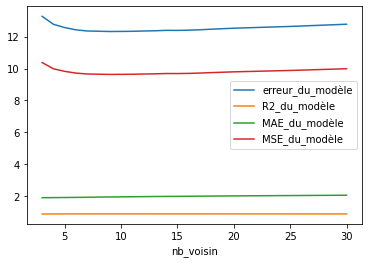

In [ ]:
frame_erreur_knr.plot('nb_voisin',['erreur_du_modèle','R2_du_modèle','MAE_du_modèle','MSE_du_modèle'])

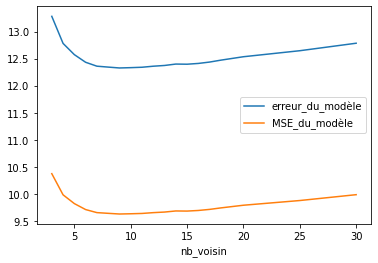

In [ ]:
frame_erreur_knr.plot('nb_voisin',['erreur_du_modèle','MSE_du_modèle'])

Text(0, 0.5, '% erreur')

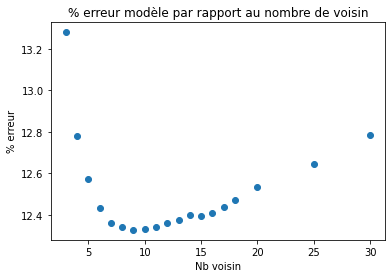

In [ ]:
erre_knr=frame_erreur_knr['erreur_du_modèle']
x_knr =frame_erreur_knr ['nb_voisin']
plt.plot(x_knr,erre_knr,'o')
plt.title('% erreur modèle par rapport au nombre de voisin')
plt.xlabel("Nb voisin")
plt.ylabel("% erreur")

In [ ]:
frame_erreur_knr['erreur_du_modèle'].min()

12.327531125966706

### Modélisation du nutri score

In [ ]:
#fonction pour modéliser le nutrition grade
def nutrition_grade_mod(frame_train,frame_test,nb_voisin):
  
  from sklearn import neighbors
  from sklearn.preprocessing import StandardScaler

  #entrainement du modèle
  y_train = frame_train['nutrition-score-fr_100g']
  x_train = frame_train[['energy-kcal_100g',	'gras_100g',	'sucre_100g',	'fiber_100g',	'proteins_100g',	'sel_100g']]
  
  knn = neighbors.KNeighborsRegressor(n_neighbors=nb_voisin) 
  knn.fit(x_train, y_train)
  pickle.dump(knn, open('knn_mod.pickle', 'wb'))

  #test du modèle
  y_test = frame_test['nutrition-score-fr_100g']
  x_test = frame_test[['energy-kcal_100g',	'gras_100g',	'sucre_100g',	'fiber_100g',	'proteins_100g',	'sel_100g']]

  predic_test = knn.predict(x_test)

  #récupération des valeurs réduites
  predic_test_frame=pd.DataFrame()
  predic_test_frame['nutritionscore_mod']=predic_test
  predic_test_frame['True_nutritionscore']=y_test
  predic_test_frame=predic_test_frame.set_index(frame_test['product_name'])
  predic_test_frame=predic_test_frame.reset_index(drop=False)

  #renvoi un pourcentage d'erreur du modèle
  error = (1 - knn.score(x_test, y_test)) * 100 
  R_2=sklearn.metrics.r2_score(y_test,predic_test)
  MAE=sklearn.metrics.mean_absolute_error(y_test,predic_test)
  MSE=sklearn.metrics.mean_squared_error(y_test,predic_test)
  print('Erreur: %f' % error,'%') 
  print('R2 =',R_2)
  print('MAE =', MAE)
  print('MSE =', MSE)
  

  return predic_test_frame

In [ ]:
#Test du model
set_mod_opti=nutrition_grade_mod (set_train,set_test,9)
set_mod_opti

Erreur: 11.739632 %
R2 = 0.8826036785698961
MAE = 1.8609787176358952
MSE = 9.253073265755926


,product_name,nutritionscore_mod,True_nutritionscore
0,Premium brussels sprouts,-10.000000,-10.0
1,Mieszanka owoców w lekkim syropie,-2.111111,-6.0
2,Tarte myrtilles,8.111111,7.0
3,"Pierce's Markets, Jack Cheese, Pepper",15.000000,15.0
4,Crème fraiche gastronomique,13.000000,13.0
...,...,...,...
122945,Kluski noodles,-3.000000,-3.0
122946,Picnic mackerel salad,7.222222,3.0
122947,Les Galettes Bretonnes pur Beurre,24.888889,25.0
122948,Petit epeautre & noisette,18.888889,20.0


### Attribution du nutrition grade

In [ ]:
#attribution du data score en lettre
def nutri_score_lettre_mod(frame):
  nutri_scor_letr = []
  for scor in frame['nutritionscore_mod']:
    if scor >= frame['nutritionscore_mod'].min() and scor <= -1:
      nutri_scor_letr.append('A')
    if scor >-1 and scor <= 2:
      nutri_scor_letr.append('B')
    if scor >2 and scor <= 10:
      nutri_scor_letr.append('C')
    if scor >10 and scor <= 18:
      nutri_scor_letr.append('D')
    if scor >18 and scor <= frame['nutritionscore_mod'].max():
      nutri_scor_letr.append('E')
  frame['nutriscore_grade'] = nutri_scor_letr
  return frame

In [ ]:
nutri_score_lettre_mod(set_mod_opti)

,product_name,nutritionscore_mod,True_nutritionscore,nutriscore_grade
0,Premium brussels sprouts,-10.000000,-10.0,A
1,Mieszanka owoców w lekkim syropie,-2.111111,-6.0,A
2,Tarte myrtilles,8.111111,7.0,C
3,"Pierce's Markets, Jack Cheese, Pepper",15.000000,15.0,D
4,Crème fraiche gastronomique,13.000000,13.0,D
...,...,...,...,...
122945,Kluski noodles,-3.000000,-3.0,A
122946,Picnic mackerel salad,7.222222,3.0,C
122947,Les Galettes Bretonnes pur Beurre,24.888889,25.0,E
122948,Petit epeautre & noisette,18.888889,20.0,E


###Comparaison des valeurs modélisées

In [ ]:
def comparaison_mod (frame,framemod):

  frame['nutriscore_grade']=frame['nutriscore_grade'].str.upper()
  scor_A = frame.copy()
  scor_B = frame.copy()
  scor_C = frame.copy()
  scor_D = frame.copy()
  scor_E = frame.copy()

  scor_A=scor_A[scor_A['nutriscore_grade']=='A']
  scor_A=scor_A.reset_index(drop=True)
  scor_B=scor_B[scor_B['nutriscore_grade']=='B']
  scor_B=scor_B.reset_index(drop=True)
  scor_C=scor_C[scor_C['nutriscore_grade']=='C']
  scor_C=scor_C.reset_index(drop=True)
  scor_D=scor_D[scor_D['nutriscore_grade']=='D']
  scor_D=scor_D.reset_index(drop=True)
  scor_E=scor_E[scor_E['nutriscore_grade']=='E']
  scor_E=scor_E.reset_index(drop=True)

  #nb d'entrée par catégorie
  letter_frame=[scor_A,scor_B,scor_C,scor_D,scor_E]
  taille_cat=[]
  for i in letter_frame:
    taille_cat.append(len(i))

  #graph bar représentant le nb d'entrée par catégorie
  #letter=pd.DataFrame(['A','B','C','D','E'])
  #letter['nb entrée']= taille_cat
  #letter=letter.set_index(letter.iloc[:,0])

  framemod['nutriscore_grade']=framemod['nutriscore_grade'].str.upper()
  scor_A = framemod.copy()
  scor_B = framemod.copy()
  scor_C = framemod.copy()
  scor_D = framemod.copy()
  scor_E = framemod.copy()

  scor_A=scor_A[scor_A['nutriscore_grade']=='A']
  scor_A=scor_A.reset_index(drop=True)
  scor_B=scor_B[scor_B['nutriscore_grade']=='B']
  scor_B=scor_B.reset_index(drop=True)
  scor_C=scor_C[scor_C['nutriscore_grade']=='C']
  scor_C=scor_C.reset_index(drop=True)
  scor_D=scor_D[scor_D['nutriscore_grade']=='D']
  scor_D=scor_D.reset_index(drop=True)
  scor_E=scor_E[scor_E['nutriscore_grade']=='E']
  scor_E=scor_E.reset_index(drop=True)

  #nb d'entrée par catégorie
  letter_frame=[scor_A,scor_B,scor_C,scor_D,scor_E]
  taille_cat_mod=[]
  for i in letter_frame:
    taille_cat_mod.append(len(i))


  #graph bar représentant le nb d'entrée par catégorie
  labels = ['A', 'B', 'C', 'D', 'E']
  true_len = taille_cat
  mod_len = taille_cat_mod

  x = np.arange(len(labels))  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, true_len, width, label='True score')
  rects2 = ax.bar(x + width/2, mod_len, width, label='Mod score')
  ax.set_ylabel('Nb entrée')
  ax.set_title('Comparaison des valeurs modélisées avec les valeurs réelles')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()
  def autolabel(rects):
      for rect in rects:
          height = rect.get_height()
          ax.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')


  autolabel(rects1)
  autolabel(rects2)

  fig.tight_layout()

  plt.show()

  #Distance à la diagonale
  mod=framemod.loc[0:50,['nutritionscore_mod']]
  mod_A=mod['nutritionscore_mod']
  x_mod_A=range(len(mod_A))

  tru=framemod.loc[0:50,['True_nutritionscore']]
  tru_A=tru['True_nutritionscore']
  x_tru_A=range(len(tru_A))

  plt.plot(x_mod_A,mod_A,'o',label='Mod score')
  plt.plot(x_tru_A,tru_A,'o',label='True score')
  plt.plot([0, 50], [0, 50], '--') 
  plt.title('Comparaison des valeurs modélisées avec les valeurs réelles')
  plt.legend(loc='upper left')
  plt.xlabel("N°entrée")
  plt.ylabel("Nutrition score")
  plt.show()



  mod=framemod.loc[0:300,['nutritionscore_mod']]
  mod_A=mod['nutritionscore_mod']
  tru=framemod.loc[0:300,['True_nutritionscore']]
  tru_A=tru['True_nutritionscore']

  x_mod_A=range(len(mod_A))
  plt.plot(mod_A,tru_A,'o',alpha=0.5)
  min_tru=tru_A.min()
  max_tru=tru_A.max()
  plt.plot([min_tru, max_tru], [min_tru, max_tru], '--') 
  plt.title('Comparaison des valeurs modélisées avec les valeurs réelles')
  plt.xlabel("Nutrition score mod")
  plt.ylabel("Nutrition score True")

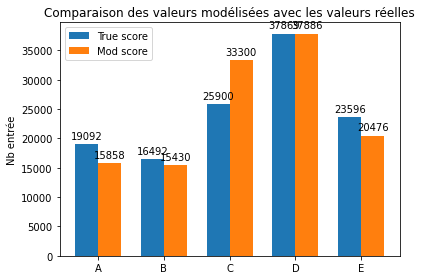

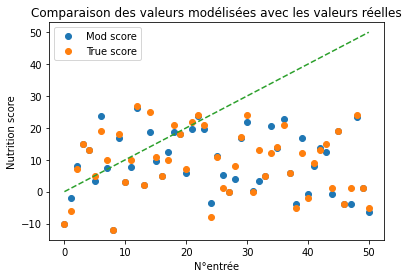

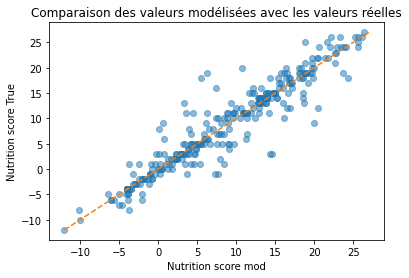

In [ ]:
comparaison_mod (set_test,set_mod_opti)

##Regression linéaire

R2 = 0.5124315036087781
MAE = 4.864871787529691
MSE = 38.42971367606708
coeff= [ 3.46325583  2.25598762  1.78026802 -2.89959122  0.12483864  1.18381744]


,product_name,nutritionscore_mod,True_nutritionscore
0,Premium brussels sprouts,-0.498563,-10.0
1,Mieszanka owoców w lekkim syropie,0.861086,-6.0
2,Tarte myrtilles,7.206386,7.0
3,"Pierce's Markets, Jack Cheese, Pepper",14.748939,15.0
4,Crème fraiche gastronomique,11.753172,13.0
...,...,...,...
122945,Kluski noodles,11.256762,-3.0
122946,Picnic mackerel salad,5.934185,3.0
122947,Les Galettes Bretonnes pur Beurre,17.693537,25.0
122948,Petit epeautre & noisette,12.148787,20.0


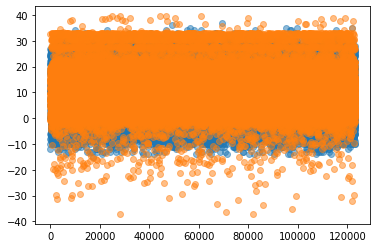

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

Y = set_train['nutrition-score-fr_100g'].copy()
X = set_train[['energy-kcal_100g',	'gras_100g',	'sucre_100g',	'fiber_100g',	'proteins_100g',	'sel_100g']].copy()

Y_test = set_test['nutrition-score-fr_100g'].copy()
X_test = set_test[['energy-kcal_100g',	'gras_100g',	'sucre_100g',	'fiber_100g',	'proteins_100g',	'sel_100g']].copy()


reg = lr.fit(X,Y)
#fait tourner le modèle avec l'échantillon xtest
Y_skl=reg.predict(X_test)

print('R2 =',sklearn.metrics.r2_score(Y_test,Y_skl))
print('MAE =', sklearn.metrics.mean_absolute_error(Y_test,Y_skl))
print('MSE =', sklearn.metrics.mean_squared_error(Y_test,Y_skl))
print('coeff=',reg.coef_)

skl_mod=pd.DataFrame()
skl_mod['product_name']=set_test['product_name']
skl_mod['nutritionscore_mod']=Y_skl
skl_mod['True_nutritionscore']=set_test['nutrition-score-fr_100g']

skl_mod

In [ ]:
nutri_score_lettre_mod(skl_mod)

,product_name,nutritionscore_mod,True_nutritionscore,nutriscore_grade
0,Premium brussels sprouts,-0.498563,-10.0,B
1,Mieszanka owoców w lekkim syropie,0.861086,-6.0,B
2,Tarte myrtilles,7.206386,7.0,C
3,"Pierce's Markets, Jack Cheese, Pepper",14.748939,15.0,D
4,Crème fraiche gastronomique,11.753172,13.0,D
...,...,...,...,...
122945,Kluski noodles,11.256762,-3.0,D
122946,Picnic mackerel salad,5.934185,3.0,C
122947,Les Galettes Bretonnes pur Beurre,17.693537,25.0,D
122948,Petit epeautre & noisette,12.148787,20.0,D


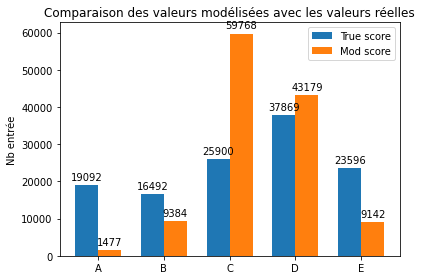

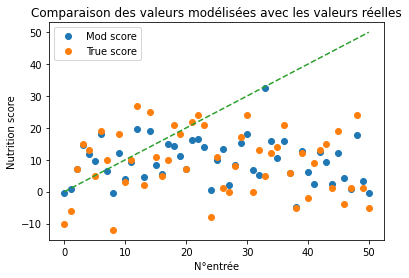

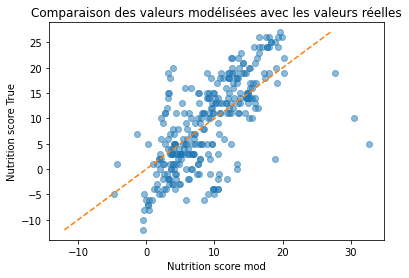

In [ ]:
comparaison_mod (set_test,skl_mod)